# Visualizing Data with {ggplot2}

Our goal in this module is to understand some basic ways of visualizing data with graphics -- bar-charts, histograms, box-plots, and so on. We will skip `base R` commands and instead just work with `ggplot2`, the most popular visualization package in the `{tidyverse}` universe as of now. 

If you remember MPA 6010, recall the usual options... 

- one qualitative/categorical variables: `bar-chart` 
- one quantitative/continuous variables: `histogram/box-plot/area-chart`  
- two quantitative/continuous variables: `scatter-plot/hex-bin` 

We can then ratchet up as we need to. 

I will use two data-sets to walk through the initial examples in this module, the first being this [IMDB data-set](http://imdb.com/)

> The internet movie database, http://imdb.com/, is a website devoted to collecting movie data supplied by studios and fans. It claims to be the biggest movie database on the web and is run by amazon. More about information imdb.com can be found online, http://imdb.com/help/show_ leaf?about, including information about the data collection process, http://imdb.com/help/show_leaf?infosource.

In [1]:
library(ggplot2movies)
data(movies)
names(movies)

[1] "title"       "year"        "length"      "budget"      "rating"     
 [6] "votes"       "r1"          "r2"          "r3"          "r4"         
[11] "r5"          "r6"          "r7"          "r8"          "r9"         
[16] "r10"         "mpaa"        "Action"      "Animation"   "Comedy"     
[21] "Drama"       "Documentary" "Romance"     "Short"

A data frame with 28819 rows and 24 variables 

| Variable | Description |
| :-- | :-- |
| title | Title of the movie |
| year | Year of release |
| budget | Total budget (if known) in US dollars |
| length | Length in minutes |
| rating | Average IMDB user rating |
| votes | Number of IMDB users who rated this movie |
| r1-10 | Multiplying by ten gives percentile (to nearest 10%) of users who rated this movie a 1 |
| mpaa | MPAA rating (missing for a lot of movies) |
| action, animation, comedy, drama, documentary, romance, short | Binary variables representing if movie was classified as belonging to that genre |

The second data-set is the [Star Wars dataset](https://swapi.co), a `tibble` with 87 rows and 13 variables:

In [2]:
library(tidyverse)
data(starwars)
names(starwars)
# str(starwars)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "name"       "height"     "mass"       "hair_color" "skin_color"
 [6] "eye_color"  "birth_year" "sex"        "gender"     "homeworld" 
[11] "species"    "films"      "vehicles"   "starships"

| Variable | Description |
| :-- | :-- |
| name | Name of the character |
| height | Height (cm) |
| mass | Weight (kg) |
| hair_color, skin_color, eye_color | Hair, skin, and eye colors |
| birth_year | Year born (BBY = Before Battle of Yavin) |
| gender | male, female, hermaphrodite, or none |
| homeworld | Name of homeworld |
| species | Name of species |
| films | List of films the character appeared in |
| vehicles | List of vehicles the character has piloted |
| starships | List of starships the character has piloted |

# `ggplot2` and the [grammar of graphics](http://vita.had.co.nz/papers/layered-grammar.html)

The `{ggplot2}` package has a special syntax and I will point out things you should note as we move through this module. First up, the library is called `ggplot2` but the command starts with `ggplot` so don't let that throw you off-track. 

Second, you need to have a data-set to work with. In the code below I start by loading the library and then specifying the data-set to be used. 

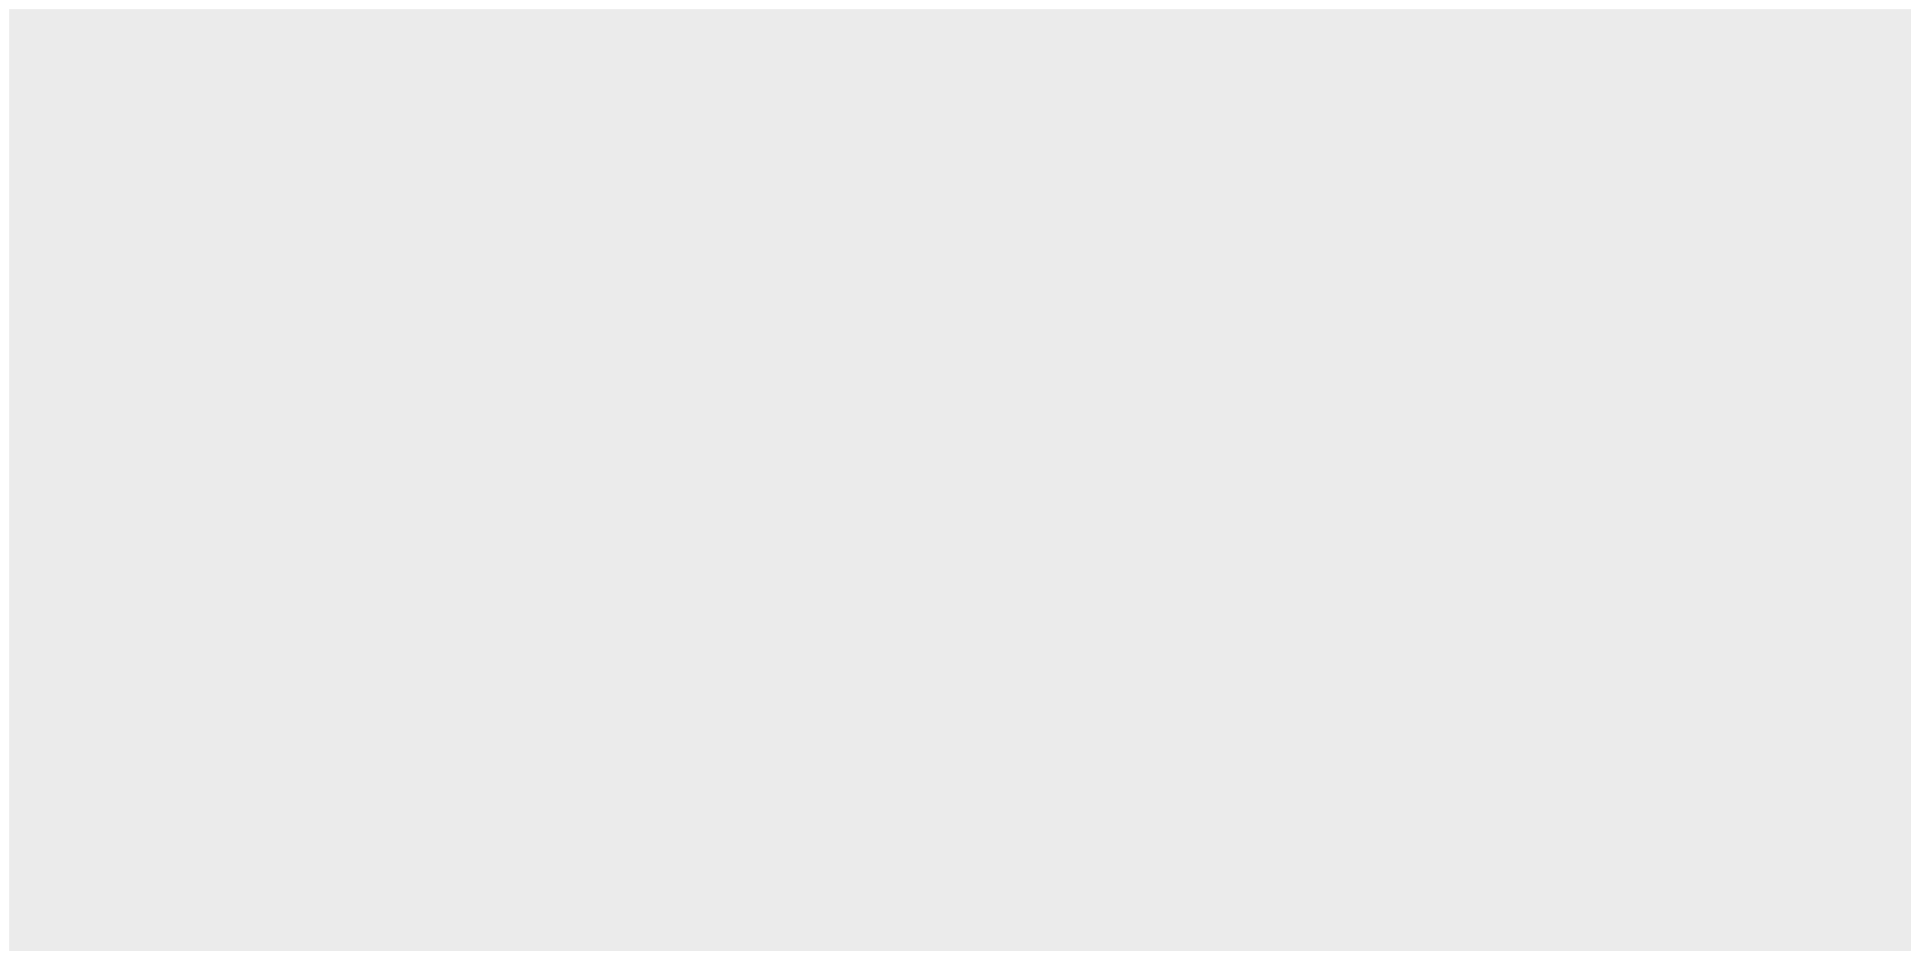

In [3]:
library(ggplot2)

options(repr.plot.width = 16, repr.plot.height = 8) 

ggplot(
  data = starwars
  )

Nothing results from these commands because we have not yet specified anything about what should go on the x-axis, what should go on the y-axis. Well, let us do that then by asking for the column `eye_color` to be put on the x-axis. 

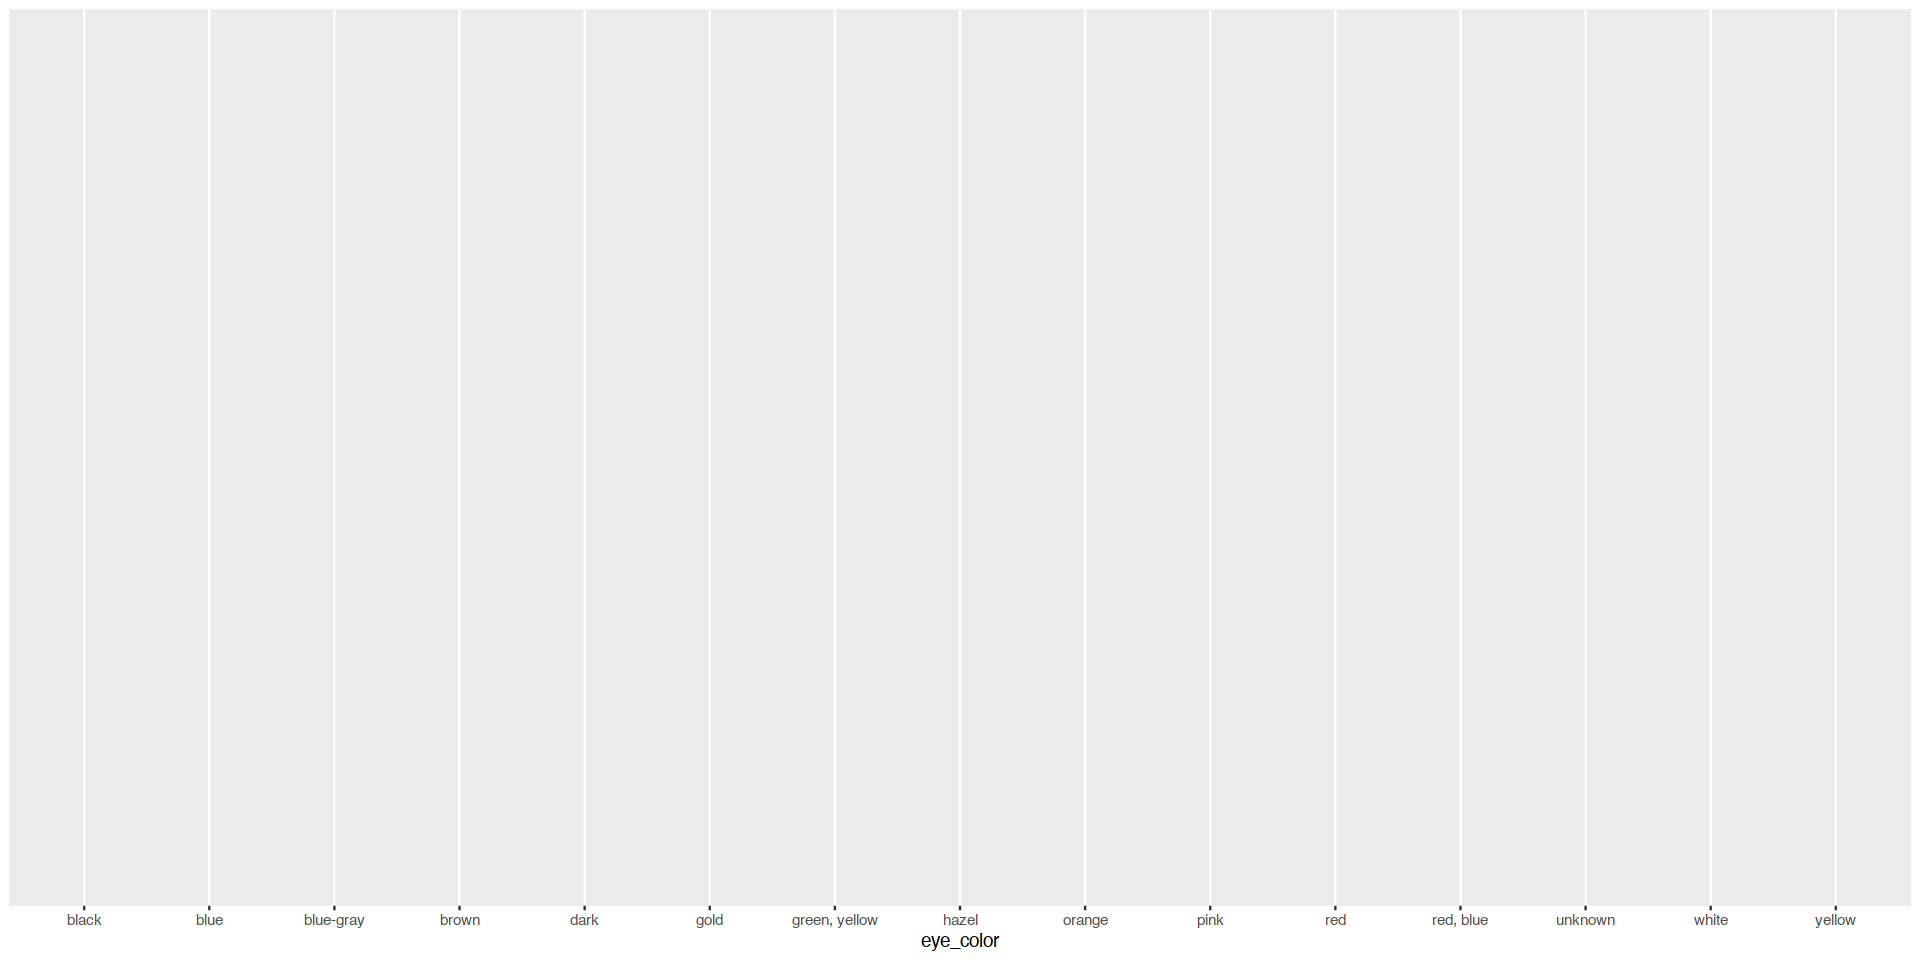

In [4]:
ggplot(
  data = starwars,
  mapping = aes(
    x = eye_color
    )
  ) 

## `geom_bar()` ... the bar-chart 
This results in a gray canvas with the eye colors on the x-axis but nothing else has been drawn since we have not specified the `geometry` ... do you want a bar-chart? histogram? dot-plot? line-chart? This is a categorical variable and hence a bar-chart would be appropriate. We call for a bar-chart with the `geom_bar()` command. 

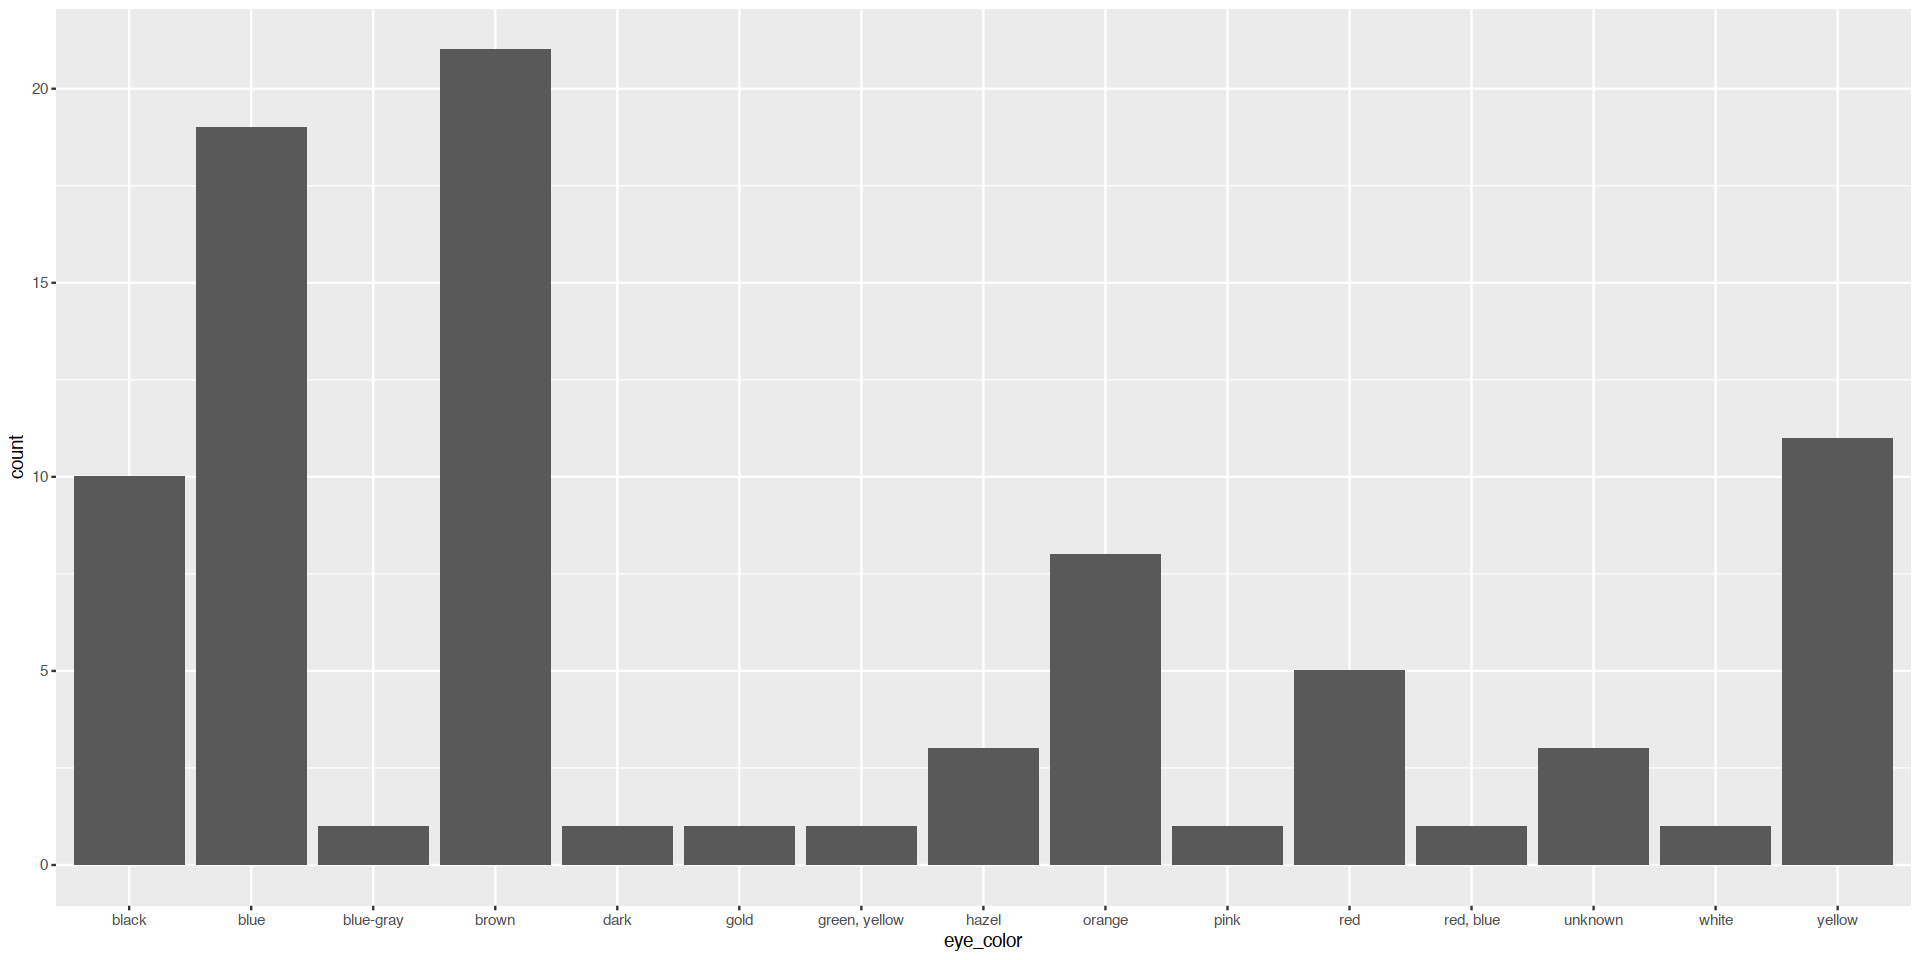

In [5]:
ggplot(
  data = starwars,
  mapping = aes(
    x = eye_color
    )
  ) +
  geom_bar()

## `color` versus `fill` 
The `aes()` refers to the **aesthetics** of the chart, and many other `aesthetics` can be added, such as `group`, `color`, `fill`, `size`, `alpha`, etc. We will see some of these in due course but for now I want to focus on two of these, both involving coloring of the `geom_`. Specifically, there are two commands for adding colors -- (1) `color` or `colour`, and (2) `fill` -- to a chart. 

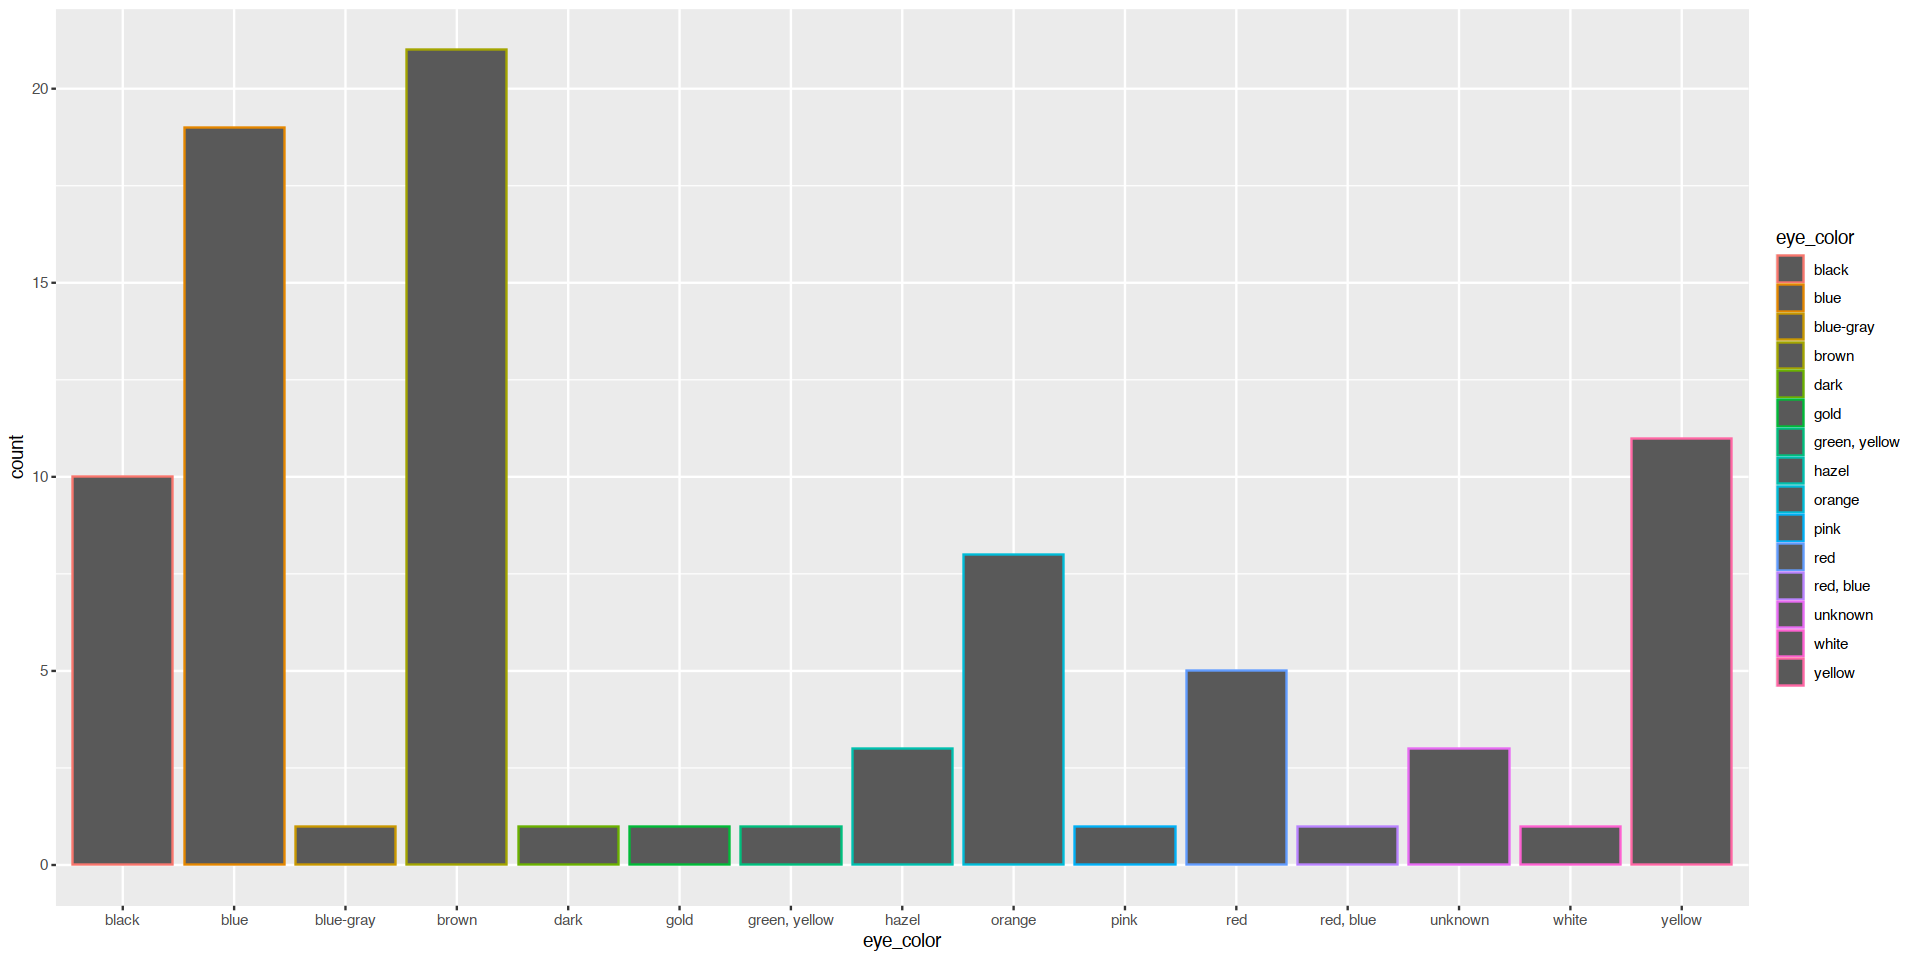

In [6]:
ggplot(
  data = starwars,
  mapping = aes(
    x = eye_color,
    color = eye_color
    )
  ) +
  geom_bar()

Note what the `color = eye_color` command did ... it drew a colored border for the bars, and an accompanying legend. What if we had used `fill = eye_color` instead?  

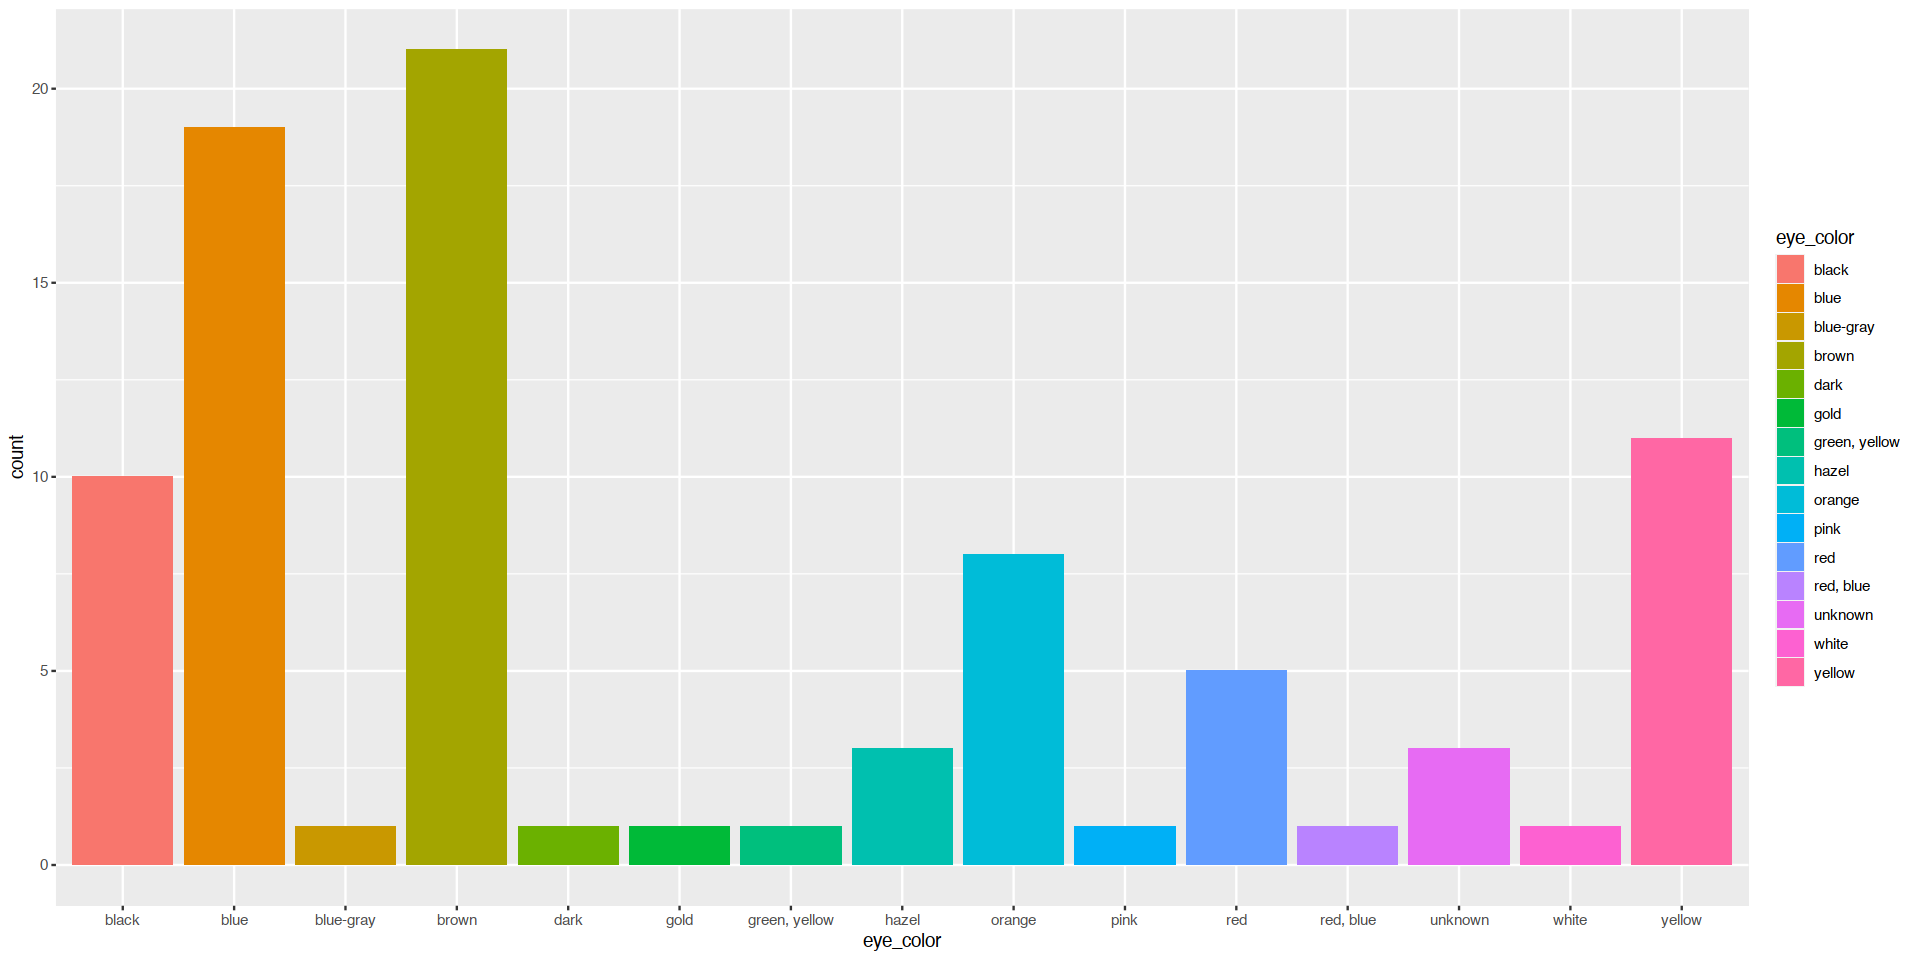

In [7]:
ggplot(
  data = starwars,
  mapping = aes(
    x = eye_color,
    fill = eye_color
    )
  ) +
  geom_bar()

Aha! Now the bars are filled with colors and an accompanying legend is drawn as well. So `fill =` and `color =` behave very differently, bear this in mind. 

## Adding labels with `labs` 
One of the nice things about this software environment is that there are plenty of coloring schemes available to us and we will play with some of these shortly, but before we do that, let us look at one more improvement -- adding titles, subtitles, captions, and axis labels to our chart. This is done with the `labs = ()` command.

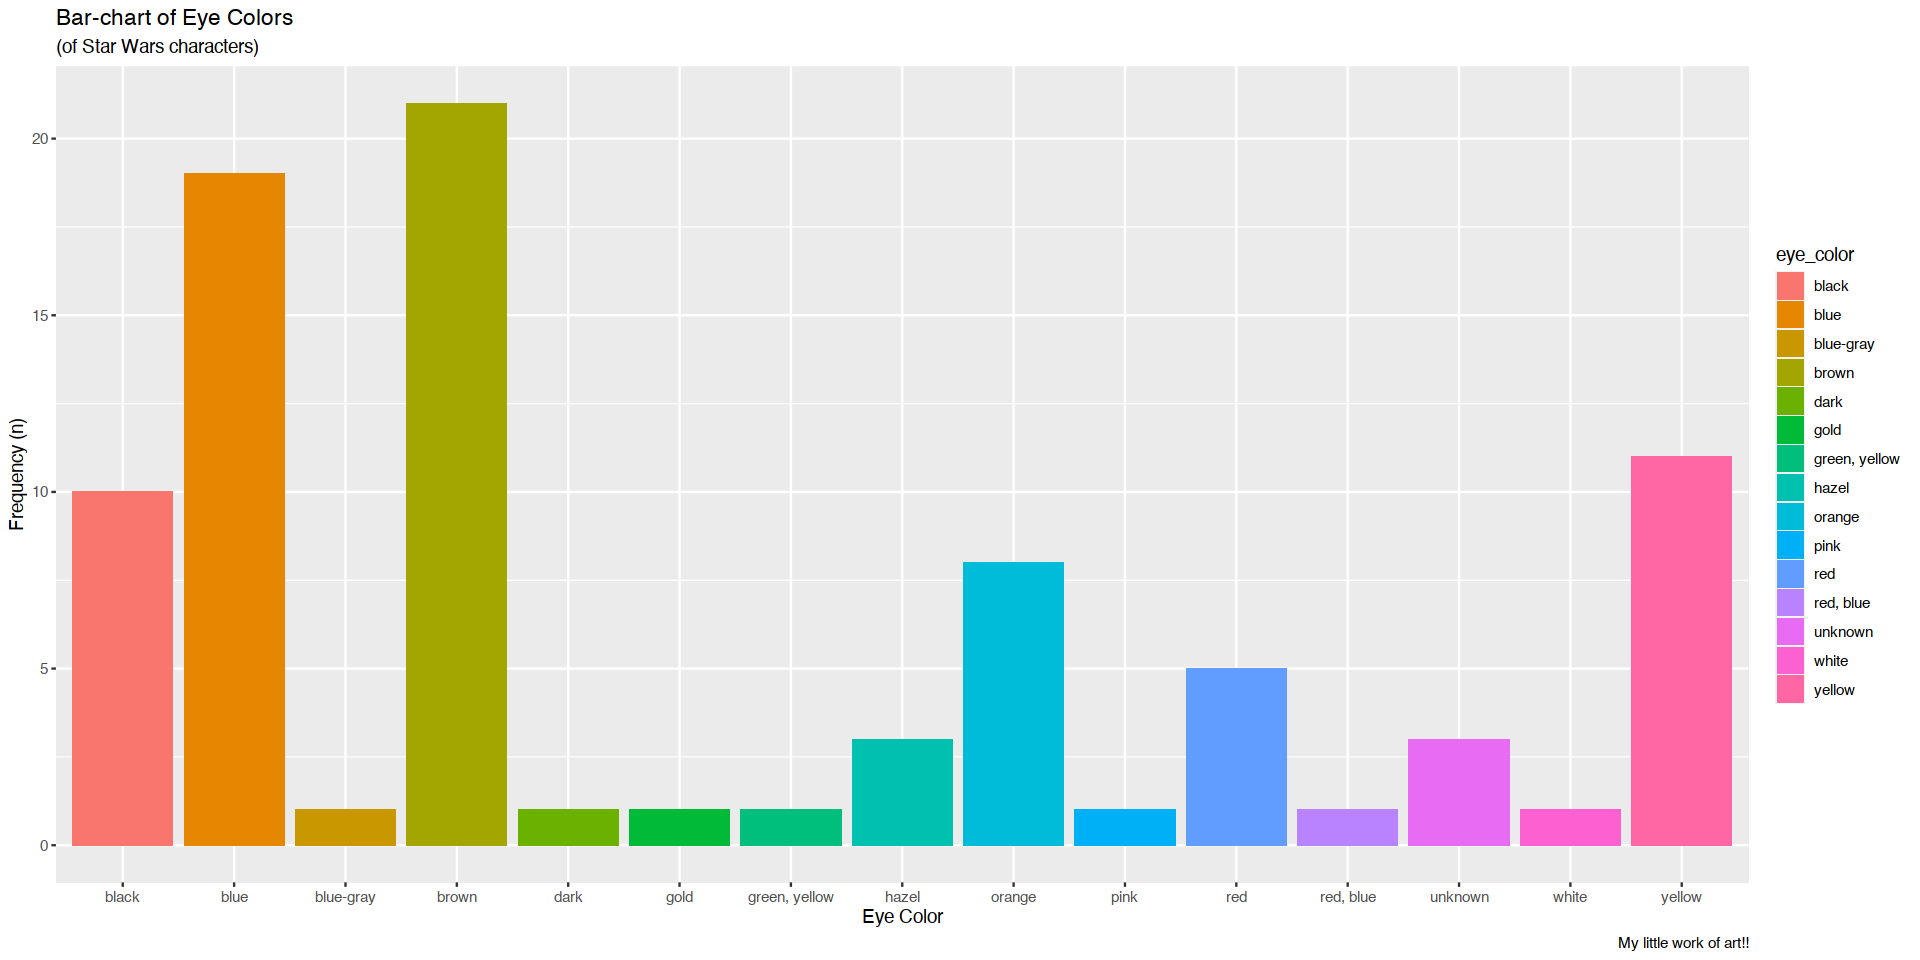

In [8]:
ggplot(
  data = starwars,
  mapping = aes(
    x = eye_color,
    fill = eye_color
    )
  ) +
  geom_bar() +
  labs(
    x = "Eye Color",
    y = "Frequency (n)",
    title = "Bar-chart of Eye Colors",
    subtitle = "(of Star Wars characters)",
    caption = "My little work of art!!"
    )

Notice the text that now appears as a result of what has been specified in the `labs()` command. 

## Controlling the chart legend with `theme()`
In this bar-chart, do we really need the legend? No, because the colors and color names show up in the chart itself. How can we hide the legend? Turns out there is a neat command that will allow you to move the legend around and even to hide it. 

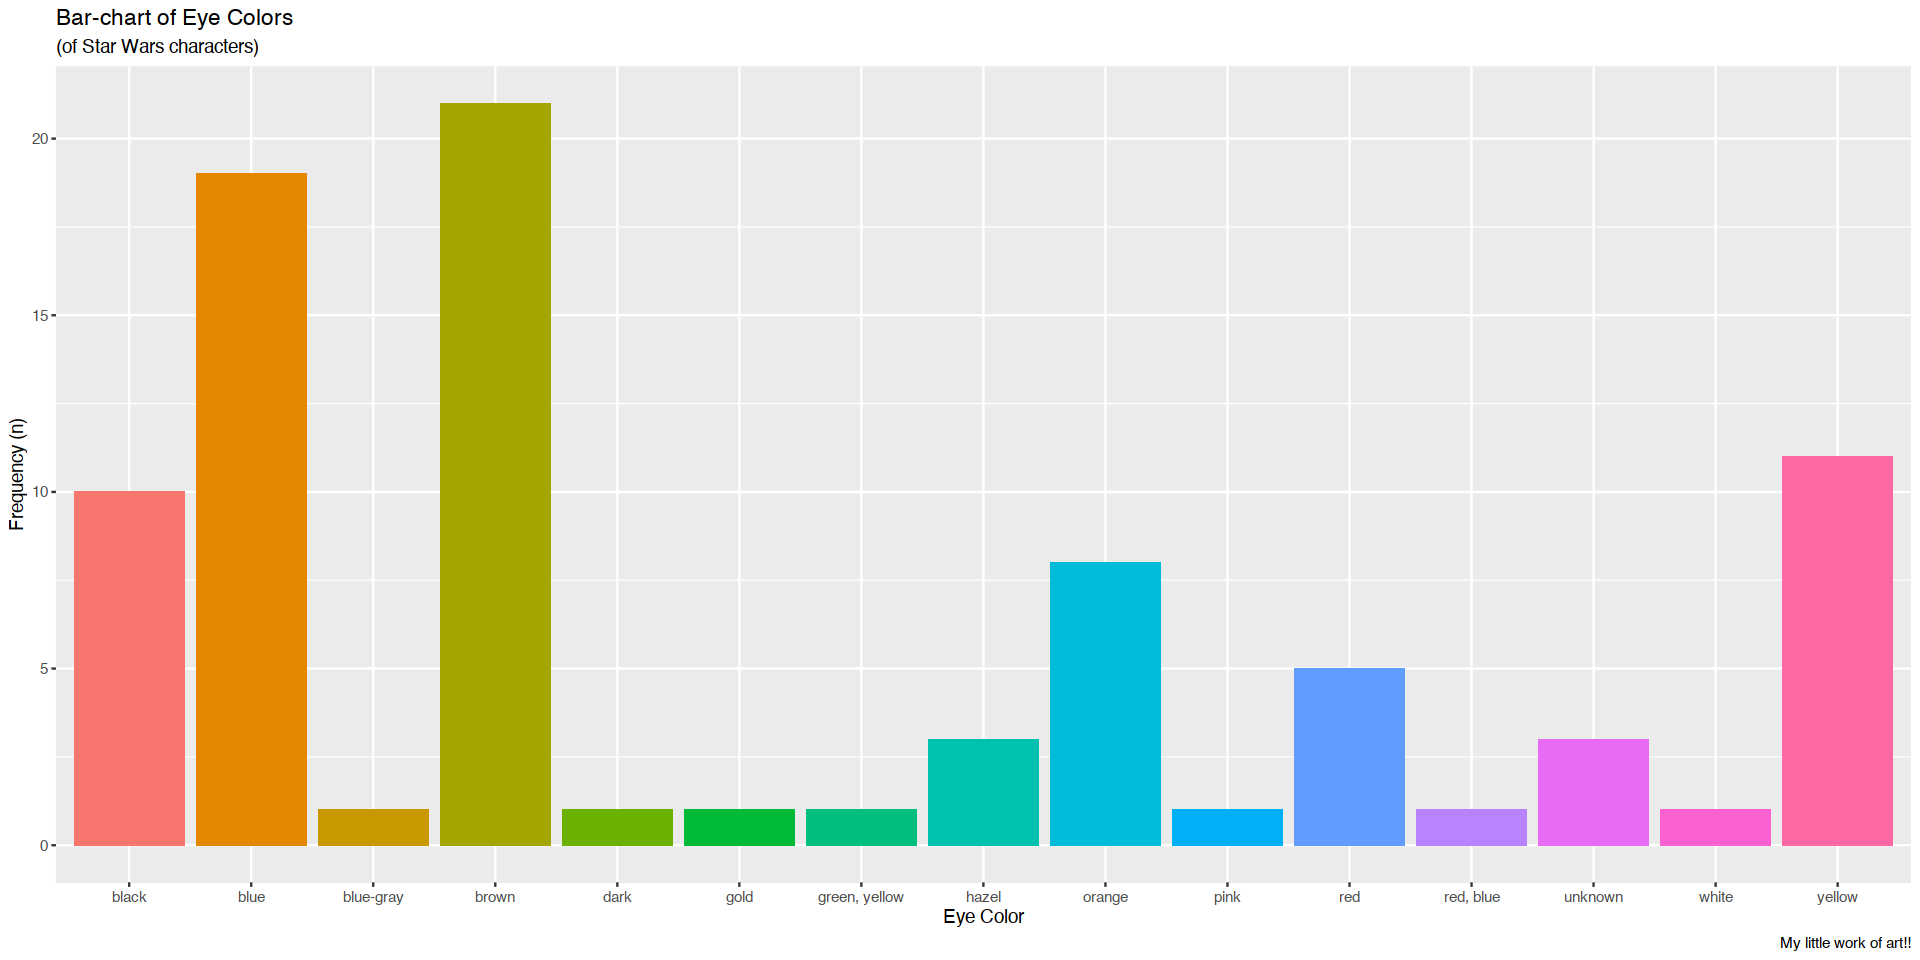

In [9]:
ggplot(
  data = starwars,
  mapping = aes(
    x = eye_color,
    fill = eye_color
    )
  ) +
  geom_bar() +
  labs(
    x = "Eye Color",
    y = "Frequency (n)",
    title = "Bar-chart of Eye Colors",
    subtitle = "(of Star Wars characters)",
    caption = "My little work of art!!"
    ) +
  theme(legend.position = "none")

Voila! The legend is gone. Instead of "none" you could have specified "bottom", "left", "top", "right" to place the legend in a particular direction.

## Customizing colors 
Of course, it would be good to have the colors match the eye-color so let us do that next. The way we can do this is by calling specific colors by name. I have tried to order the lineup of the colors to match, as closely as I can, the eye colors. 

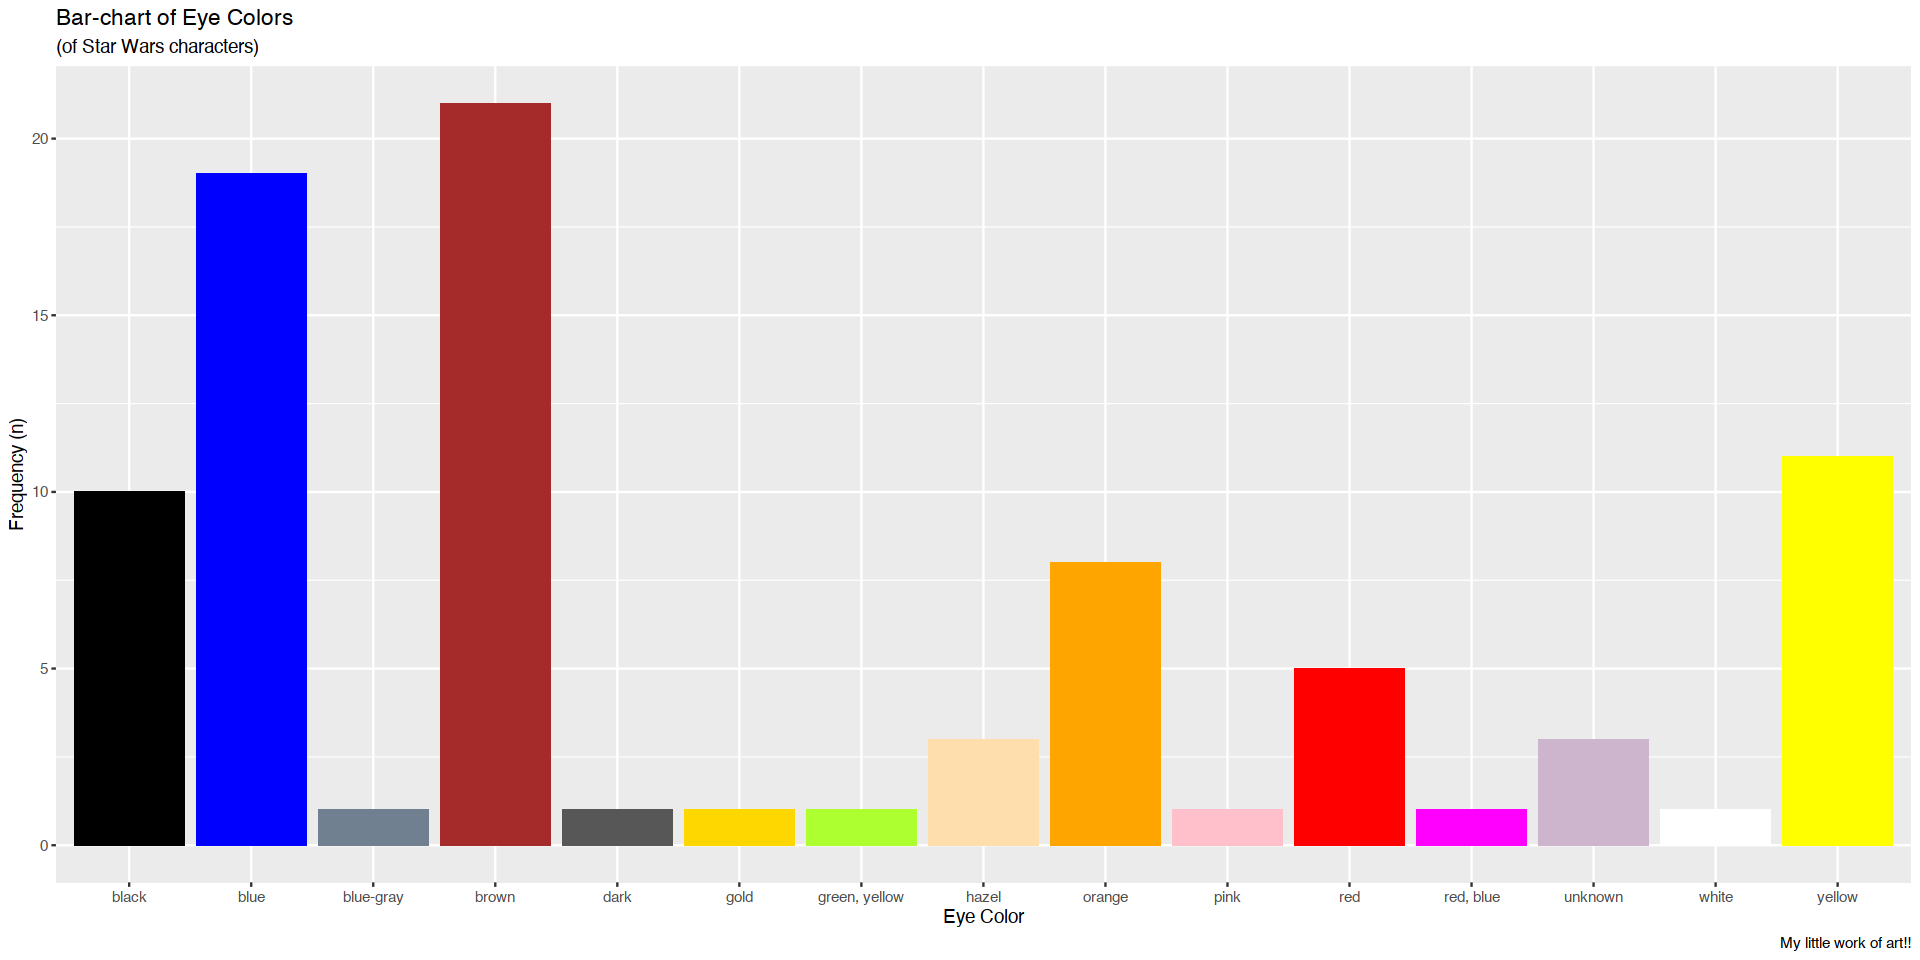

In [10]:
c(
  "black", "blue", "slategray", "brown", "gray34", "gold",
  "greenyellow", "navajowhite1", "orange", "pink", "red",
  "magenta", "thistle3", "white", "yellow"
  ) -> mycolors

ggplot(
  data = starwars,
  mapping = aes(
    x = eye_color
    )
  ) + 
  geom_bar(
    fill = mycolors
    ) + 
  labs(
    x = "Eye Color",
    y = "Frequency (n)",
    title = "Bar-chart of Eye Colors",
    subtitle = "(of Star Wars characters)",
    caption = "My little work of art!!"
    ) +
  theme(legend.position = "none")

These colors are from [this source](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf) but see also [this source](https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf). Colors can be customized by generating your own palettes via the [Color Brewer here](http://colorbrewer2.org/#type=sequential&scheme=YlGnBu&n=3). But don't get carried away: Remember to read the materials on choosing colors wisely, particularly the point about qualitative palettes, divergent palettes, and then palettes that work well even with colorblind audiences.

## Selected color palettes
I had mentioned the existence of a number of color palettes so let us look at a few, but we will do this with a different variable. First up, the `Pastel1` palette. 

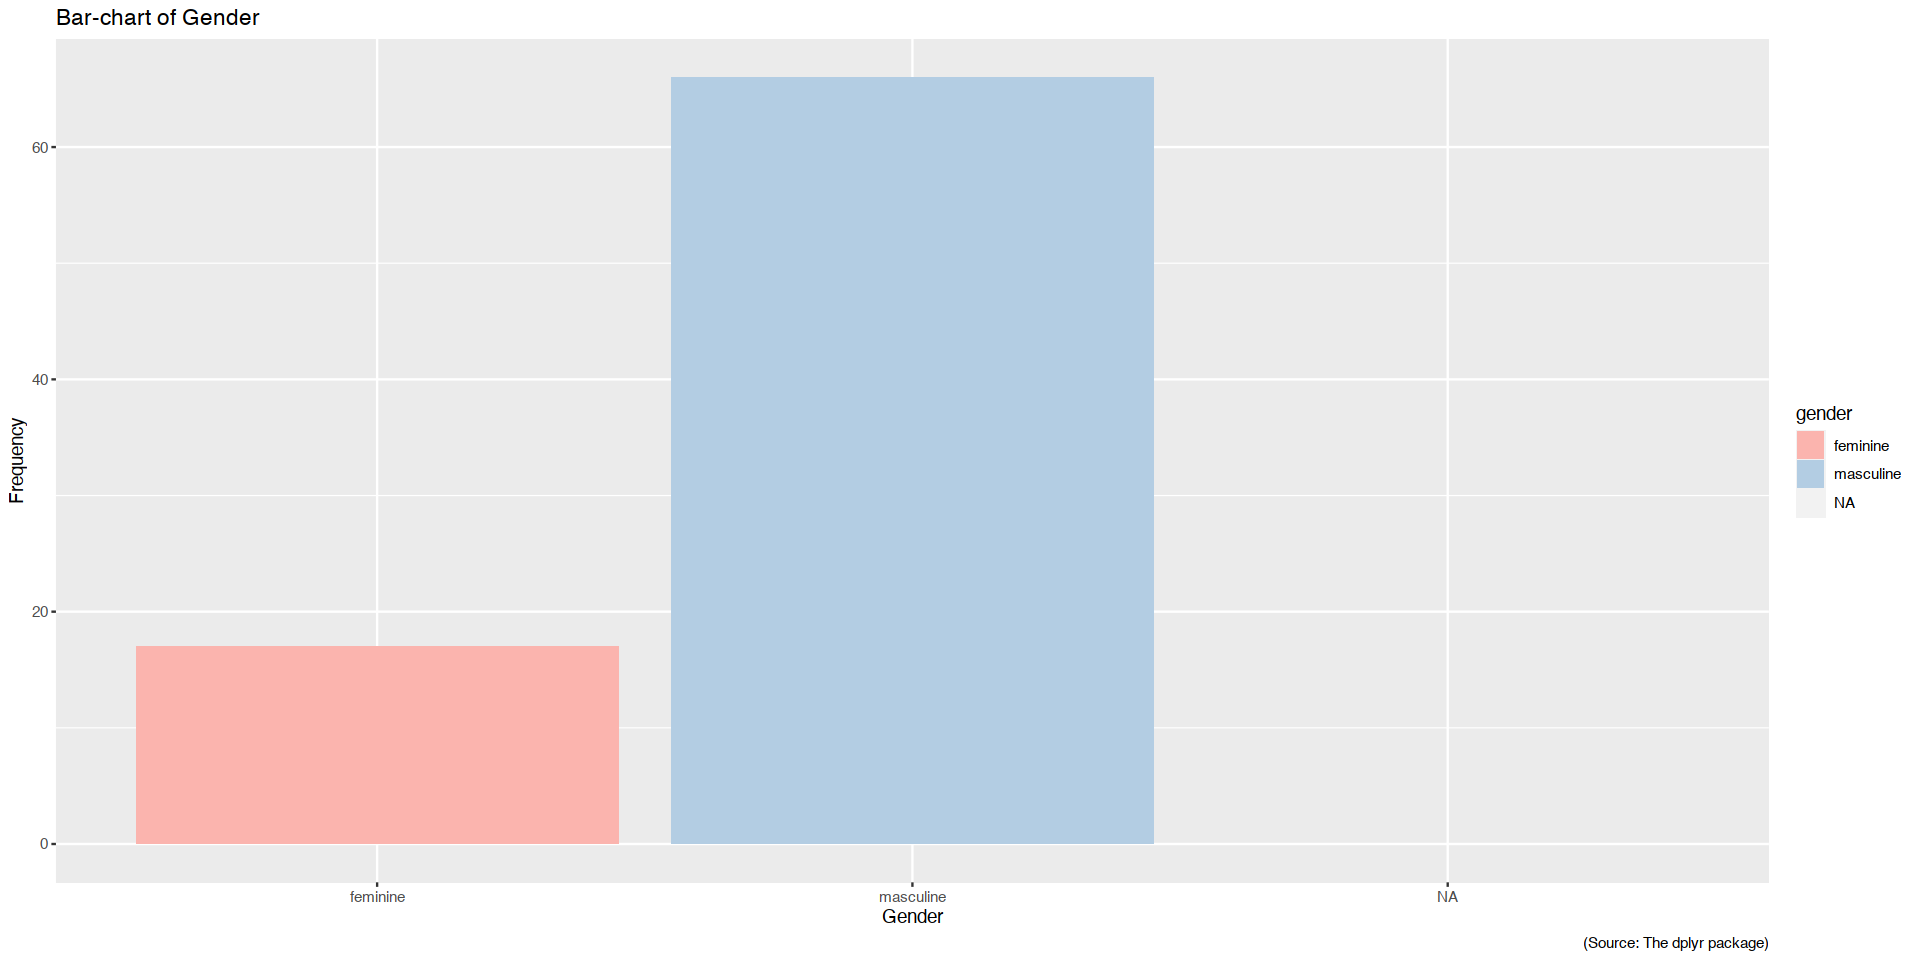

In [11]:
ggplot(
  data = starwars,
  mapping = aes(
    x = gender
    )
  ) + 
  geom_bar(
    aes(fill = gender)
    ) + 
  labs(
    x = "Gender",
    y = "Frequency",
    title = "Bar-chart of Gender",
    subttitle = "(of Star Wars characters)",
    caption = "(Source: The dplyr package)") +
  scale_fill_brewer(
    palette = "Pastel1"
    )

Not bad but doesn't work too well here. How about trying another palette, `Set`?

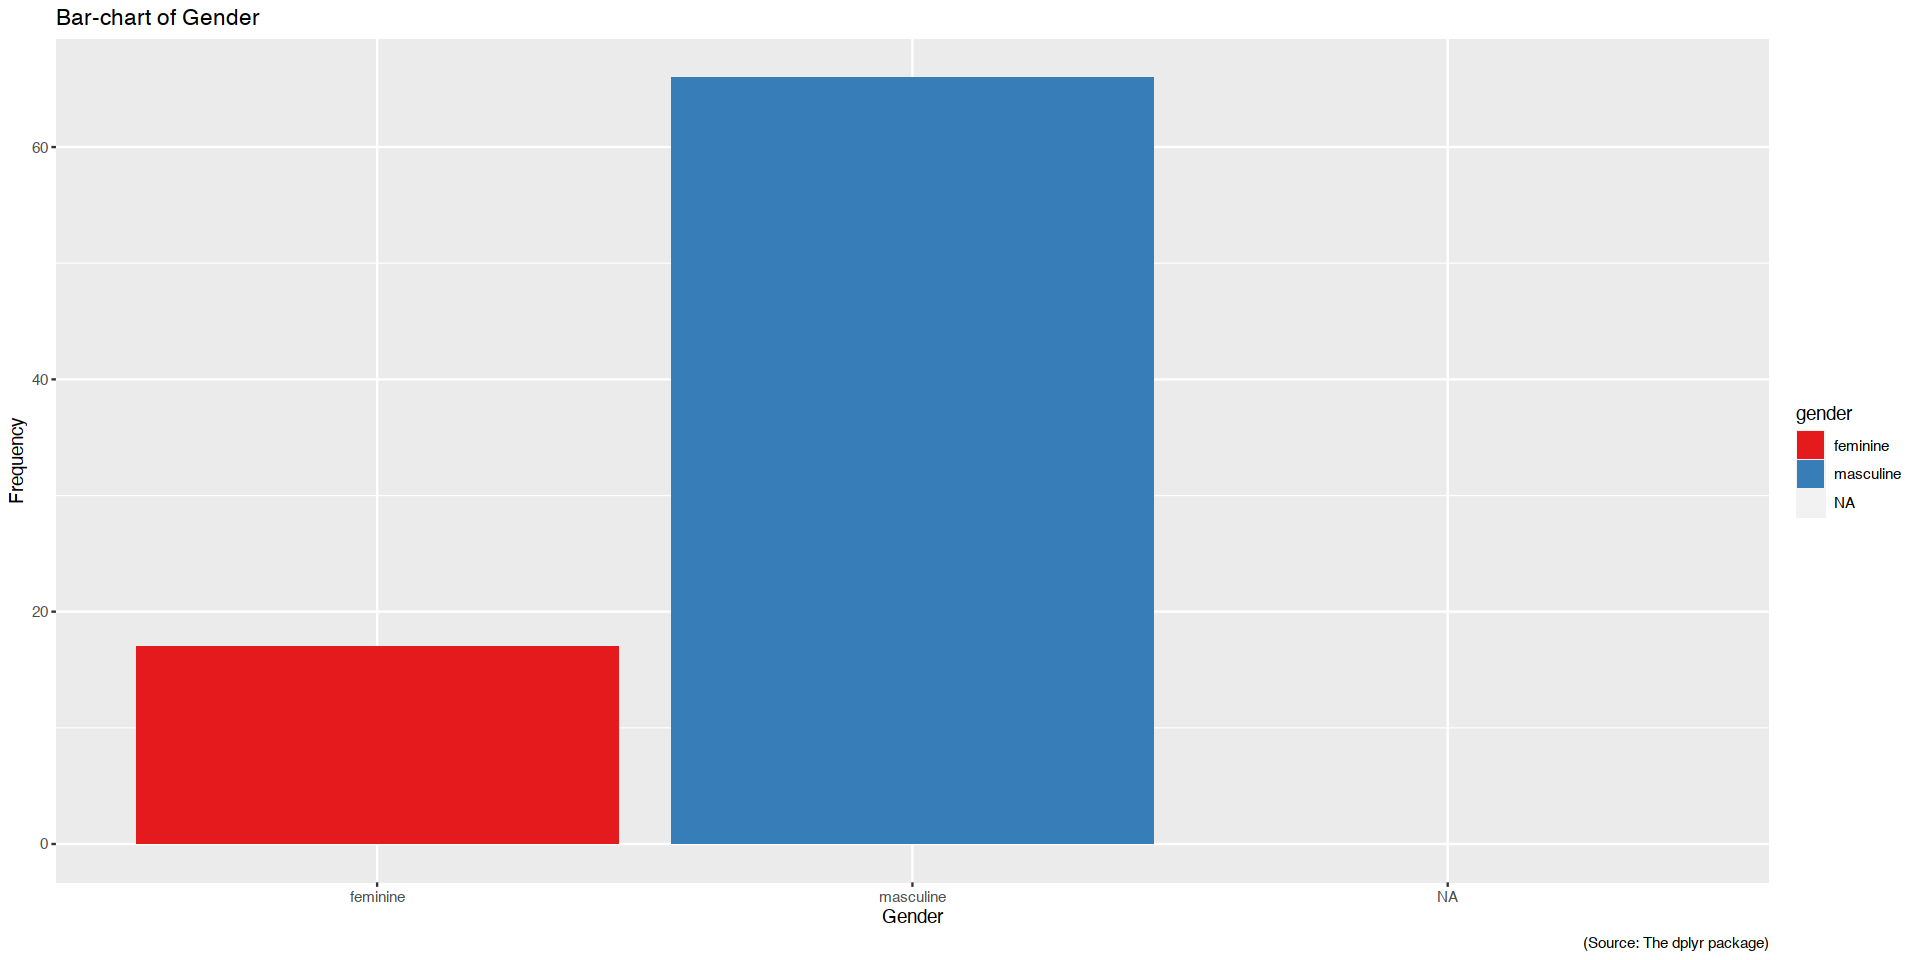

In [12]:
ggplot(
  data = starwars,
  mapping = aes(
    x = gender
    )
  ) + 
  geom_bar(
    aes(fill = gender)
    ) + 
  labs(
    x = "Gender",
    y = "Frequency",
    title = "Bar-chart of Gender",
    subttitle = "(of Star Wars characters)",
    caption = "(Source: The dplyr package)") +
  scale_fill_brewer(
    palette = "Set1"
    )

Nice! But what is also noticeable here is that there are some characters in the data-set whose gender data is missing. These are the `NA` values. By default, you will see `NA` values showing up in some types of charts and so it is always good to exclude them from the chart. Here is one way of doing that. 

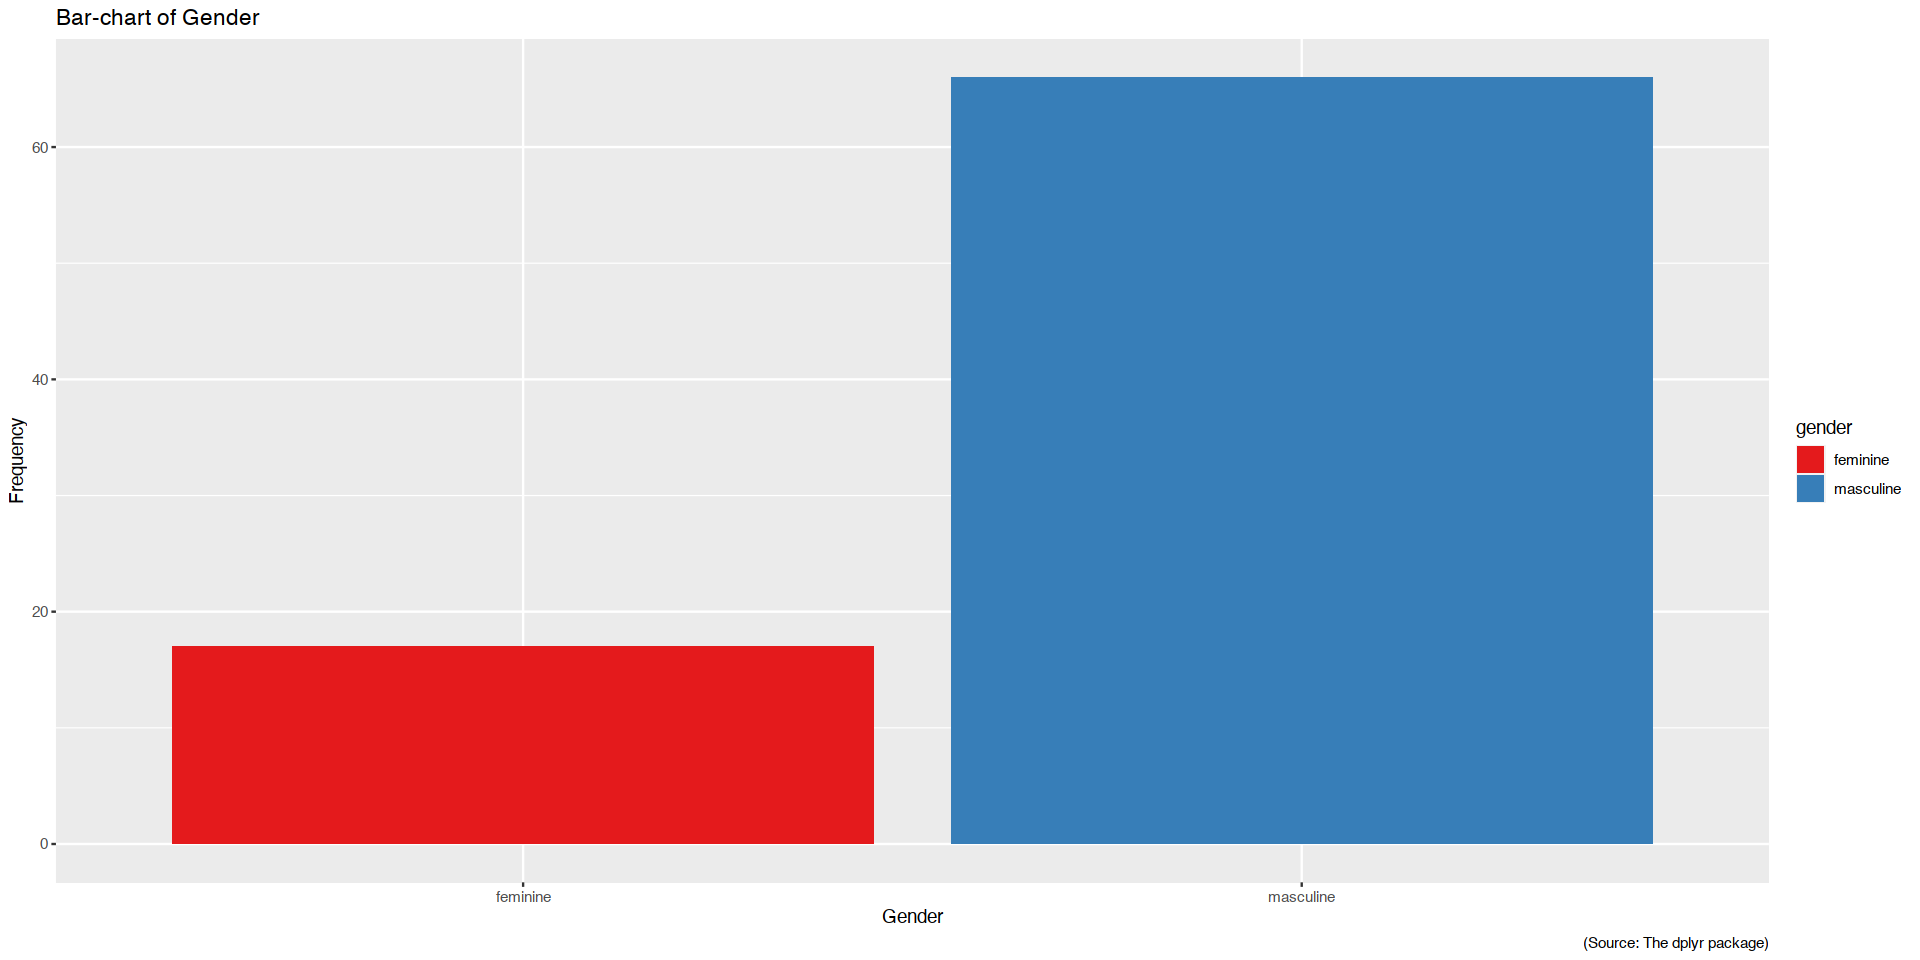

In [13]:
ggplot(
  data = subset(starwars, !is.na(gender)),
  mapping = aes(
    x = gender
    )
  ) + 
  geom_bar(
    aes(fill = gender)
    ) + 
  labs(
    x = "Gender",
    y = "Frequency",
    title = "Bar-chart of Gender",
    subttitle = "(of Star Wars characters)",
    caption = "(Source: The dplyr package)") +
  scale_fill_brewer(
    palette = "Set1"
    )

Notice what is different here: `data = subset(starwars, !is.na(gender))` and that this command is effectively saying subset the starwars data to only include those cases where gender is not missing (this is the `!is.na()` portion of the command). 

Another way to do the same thing would have been to use `filter()` and create a cleaned up copy of the data. If you take this route, be careful not to overwrite the original data-set; note how I am giving a new name `(my.data)` after `filter()` to save the results in. Then we lean on this data-set via `data = my.data`.

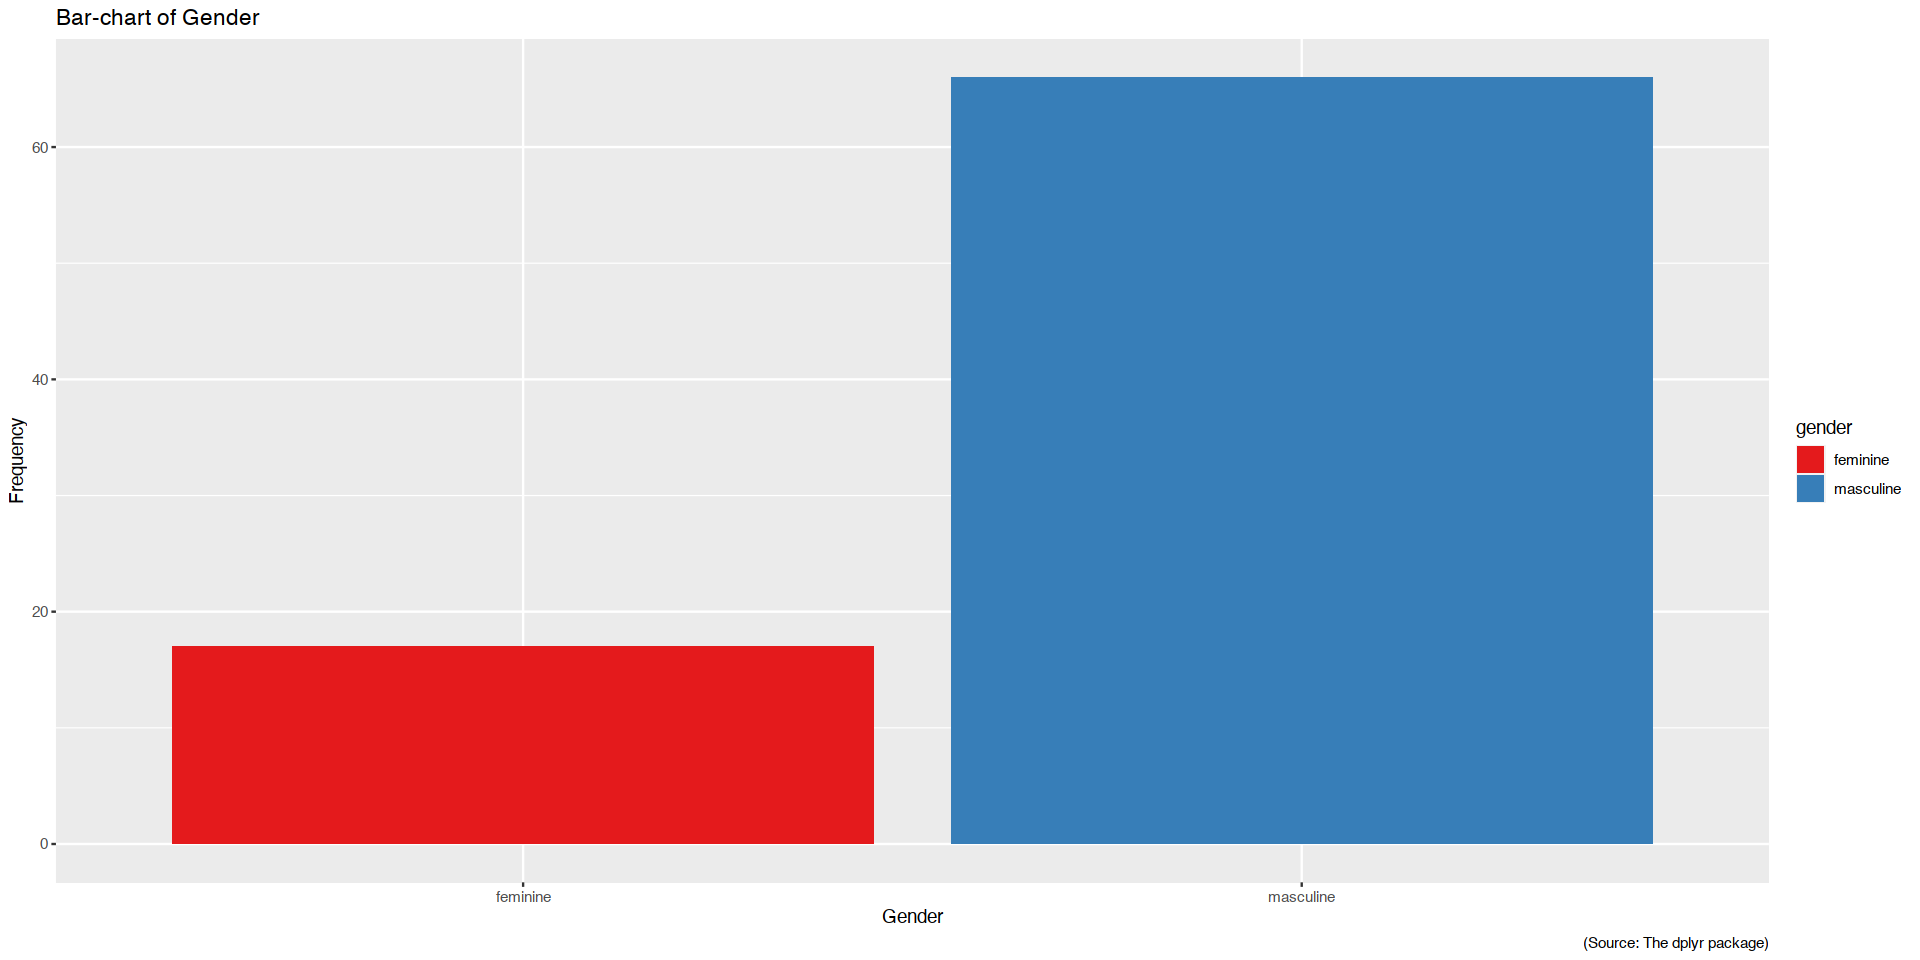

In [14]:
starwars %>%
  filter(!is.na(gender)) -> my.data

ggplot(
  data = my.data,
  mapping = aes(
    x = gender
    )
  ) + 
  geom_bar(
    aes(fill = gender)
    ) + 
  labs(
    x = "Gender",
    y = "Frequency",
    title = "Bar-chart of Gender",
    subttitle = "(of Star Wars characters)",
    caption = "(Source: The dplyr package)") +
  scale_fill_brewer(
    palette = "Set1"
    )

There is one color palette you should remember, and this is the `{viridis}` color scheme that works around varying types of color blindness in the population. Here come the palettes:

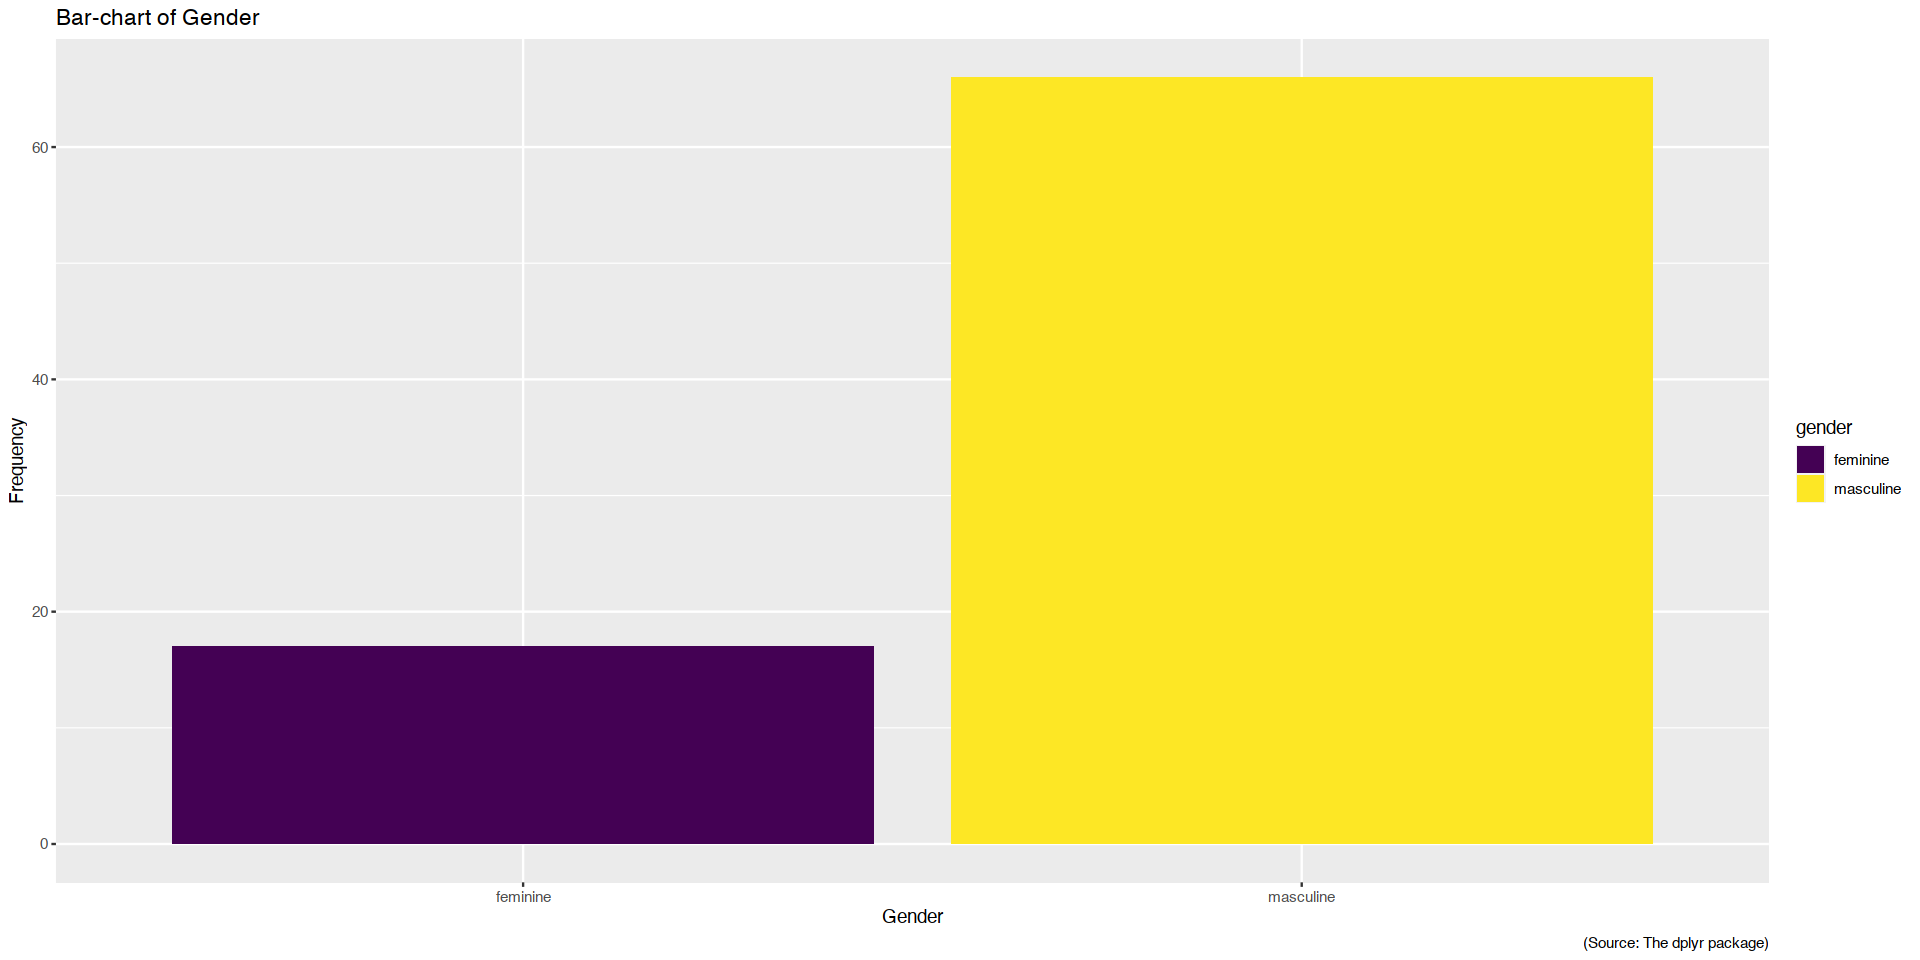

In [15]:
ggplot(
  data = my.data,
  mapping = aes(
    x = gender
    )
  ) + 
  geom_bar(
    aes(fill = gender)
    ) + 
  labs(
    x = "Gender",
    y = "Frequency",
    title = "Bar-chart of Gender",
    subttitle = "(of Star Wars characters)",
    caption = "(Source: The dplyr package)") +
  scale_fill_viridis_d(
    option = "viridis"
    )

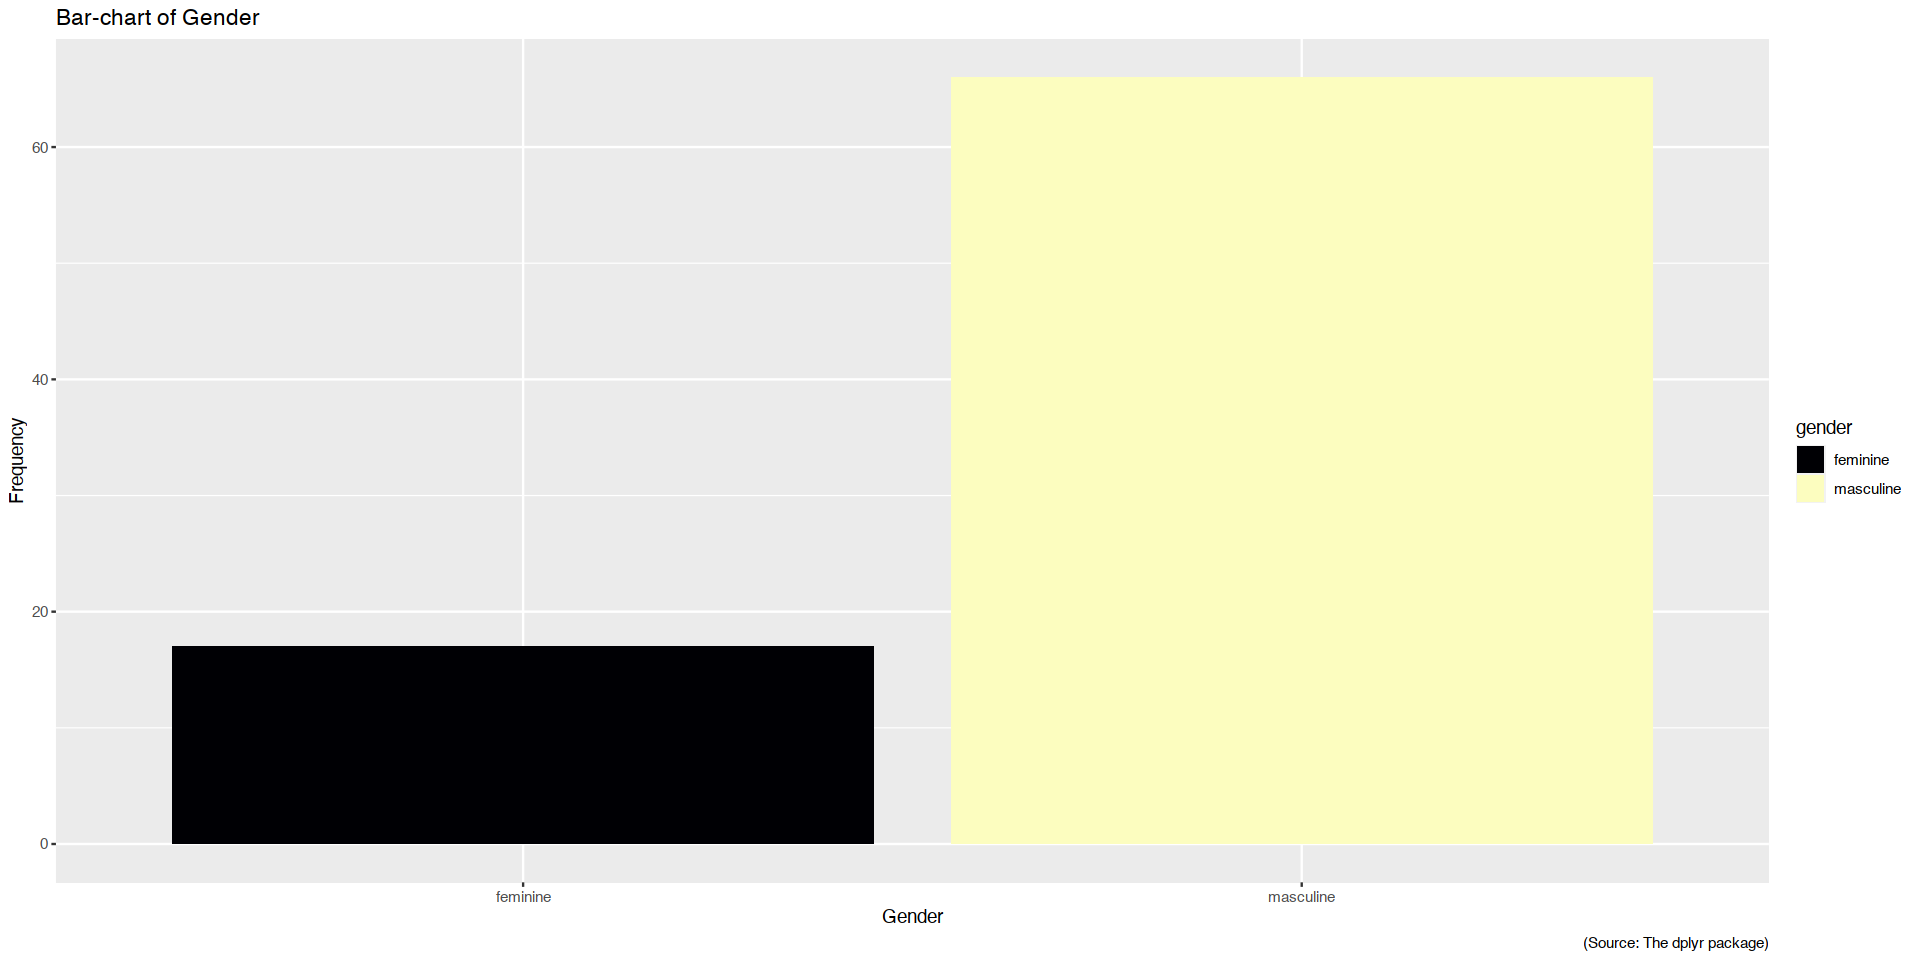

In [16]:
ggplot(
  data = my.data,
  mapping = aes(
    x = gender
    )
  ) + 
  geom_bar(
    aes(fill = gender)
    ) + 
  labs(
    x = "Gender",
    y = "Frequency",
    title = "Bar-chart of Gender",
    subttitle = "(of Star Wars characters)",
    caption = "(Source: The dplyr package)") +
  scale_fill_viridis_d(
    option = "magma"
    )

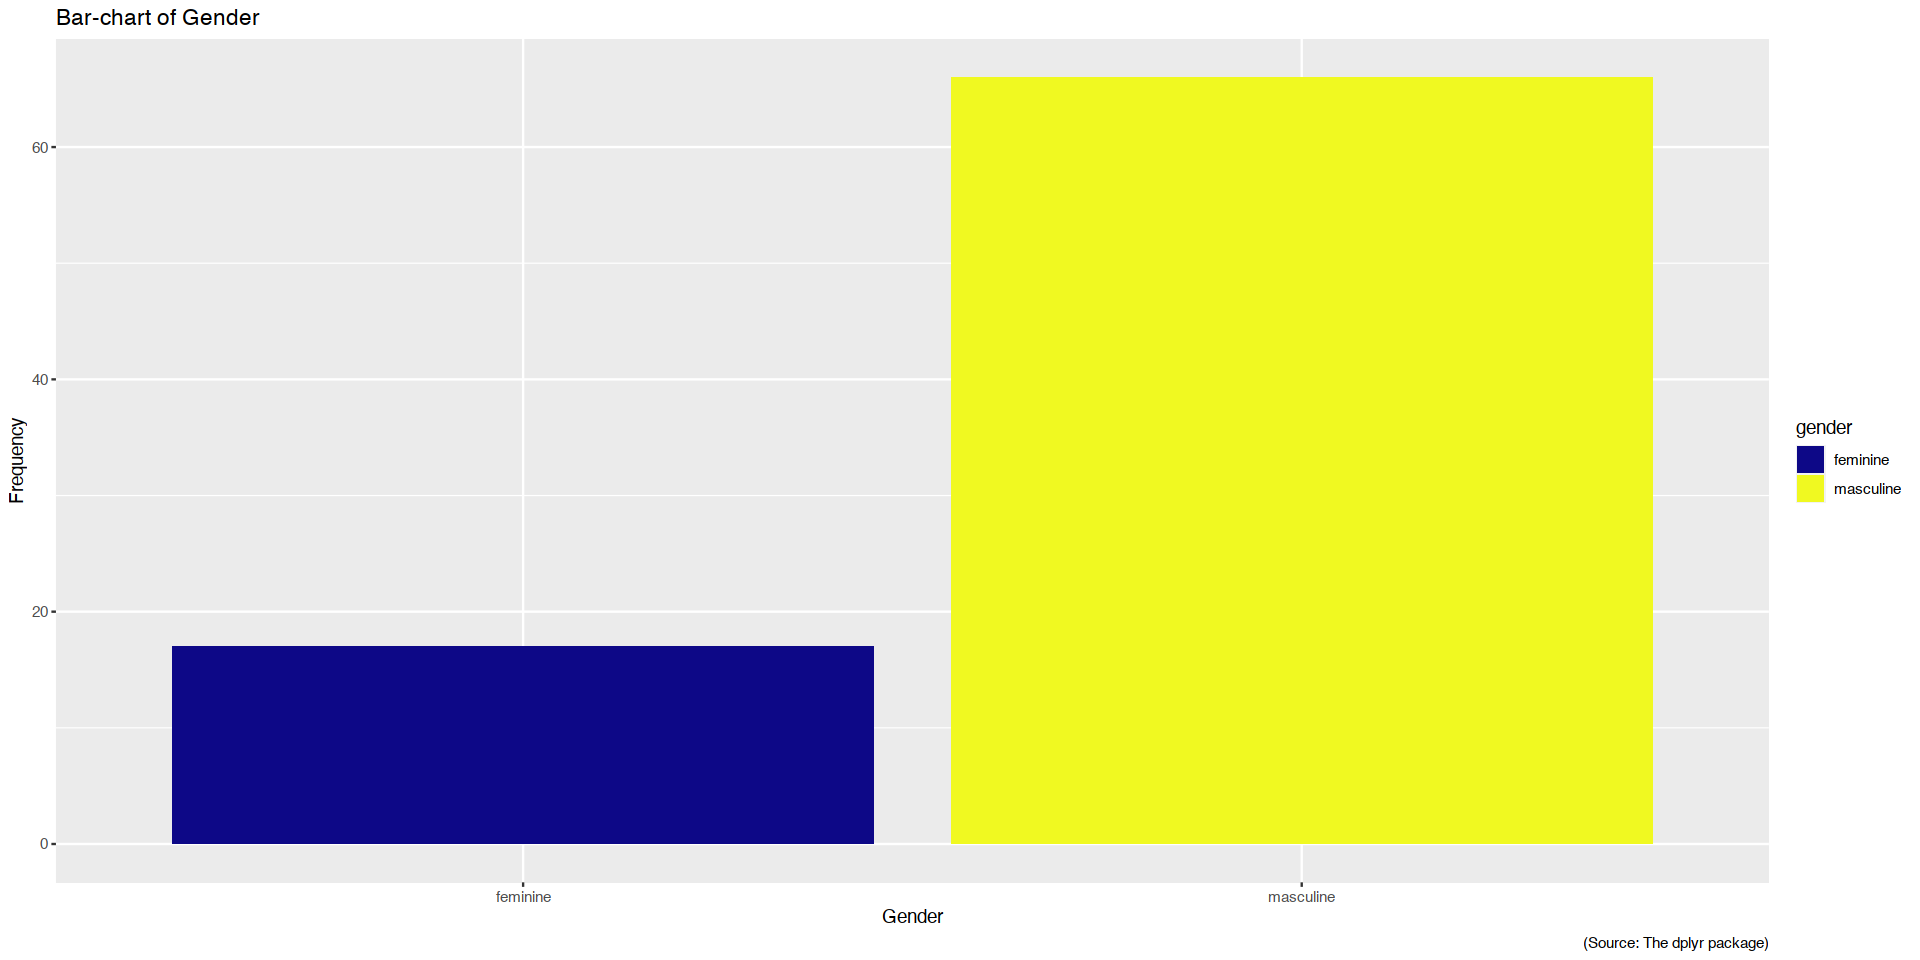

In [17]:
ggplot(
  data = my.data,
  mapping = aes(
    x = gender
    )
  ) + 
  geom_bar(
    aes(fill = gender)
    ) + 
  labs(
    x = "Gender",
    y = "Frequency",
    title = "Bar-chart of Gender",
    subttitle = "(of Star Wars characters)",
    caption = "(Source: The dplyr package)") +
  scale_fill_viridis_d(
    option = "plasma"
    )

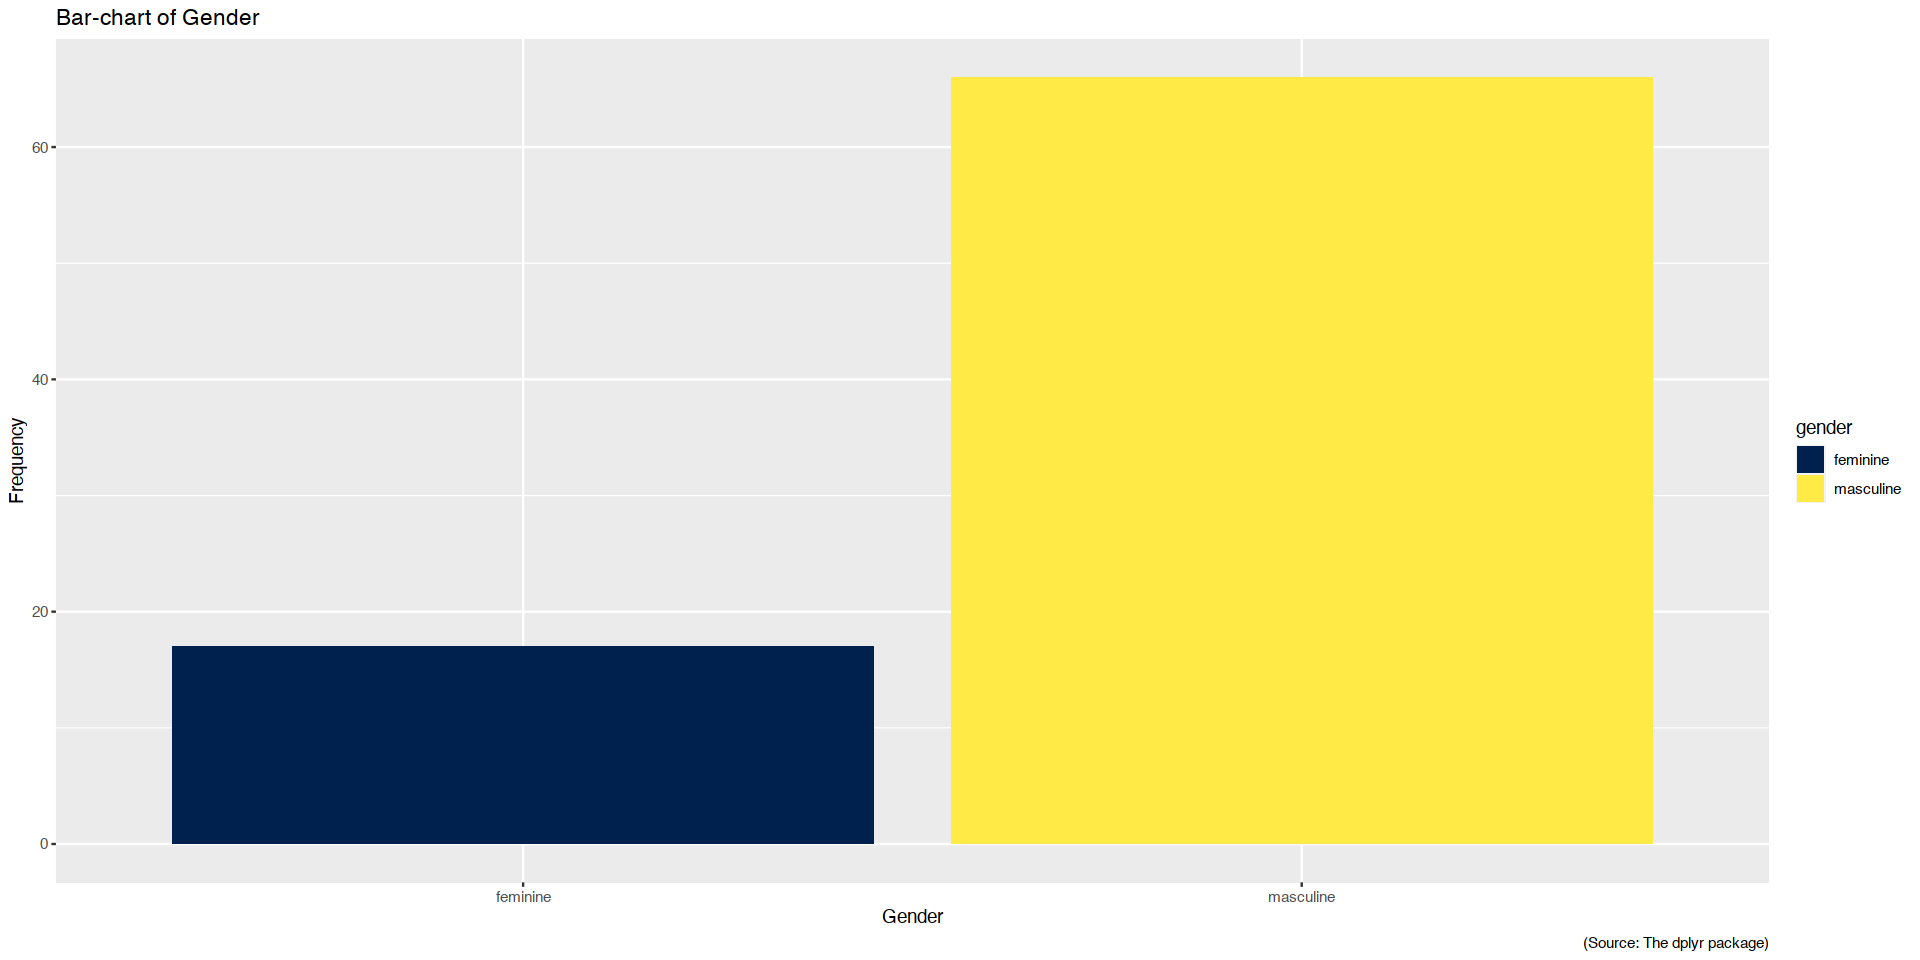

In [18]:
ggplot(
  data = my.data,
  mapping = aes(
    x = gender
    )
  ) + 
  geom_bar(
    aes(fill = gender)
    ) + 
  labs(
    x = "Gender",
    y = "Frequency",
    title = "Bar-chart of Gender",
    subttitle = "(of Star Wars characters)",
    caption = "(Source: The dplyr package)") +
  scale_fill_viridis_d(
    option = "cividis"
    )

## Themes with `{ggthemes}`
One can also lean on various plotting themes as shown below. These themes mimic the style of graphics popularized by some data visualization experts (for e.g., Stephen Few, Edward Tufte), news-media houses (Fivethirtyeight, The Economist, The Wall Street Journal), some software packages (Excel, Stata, Google docs), and a few others. Below I show you just a handful.  

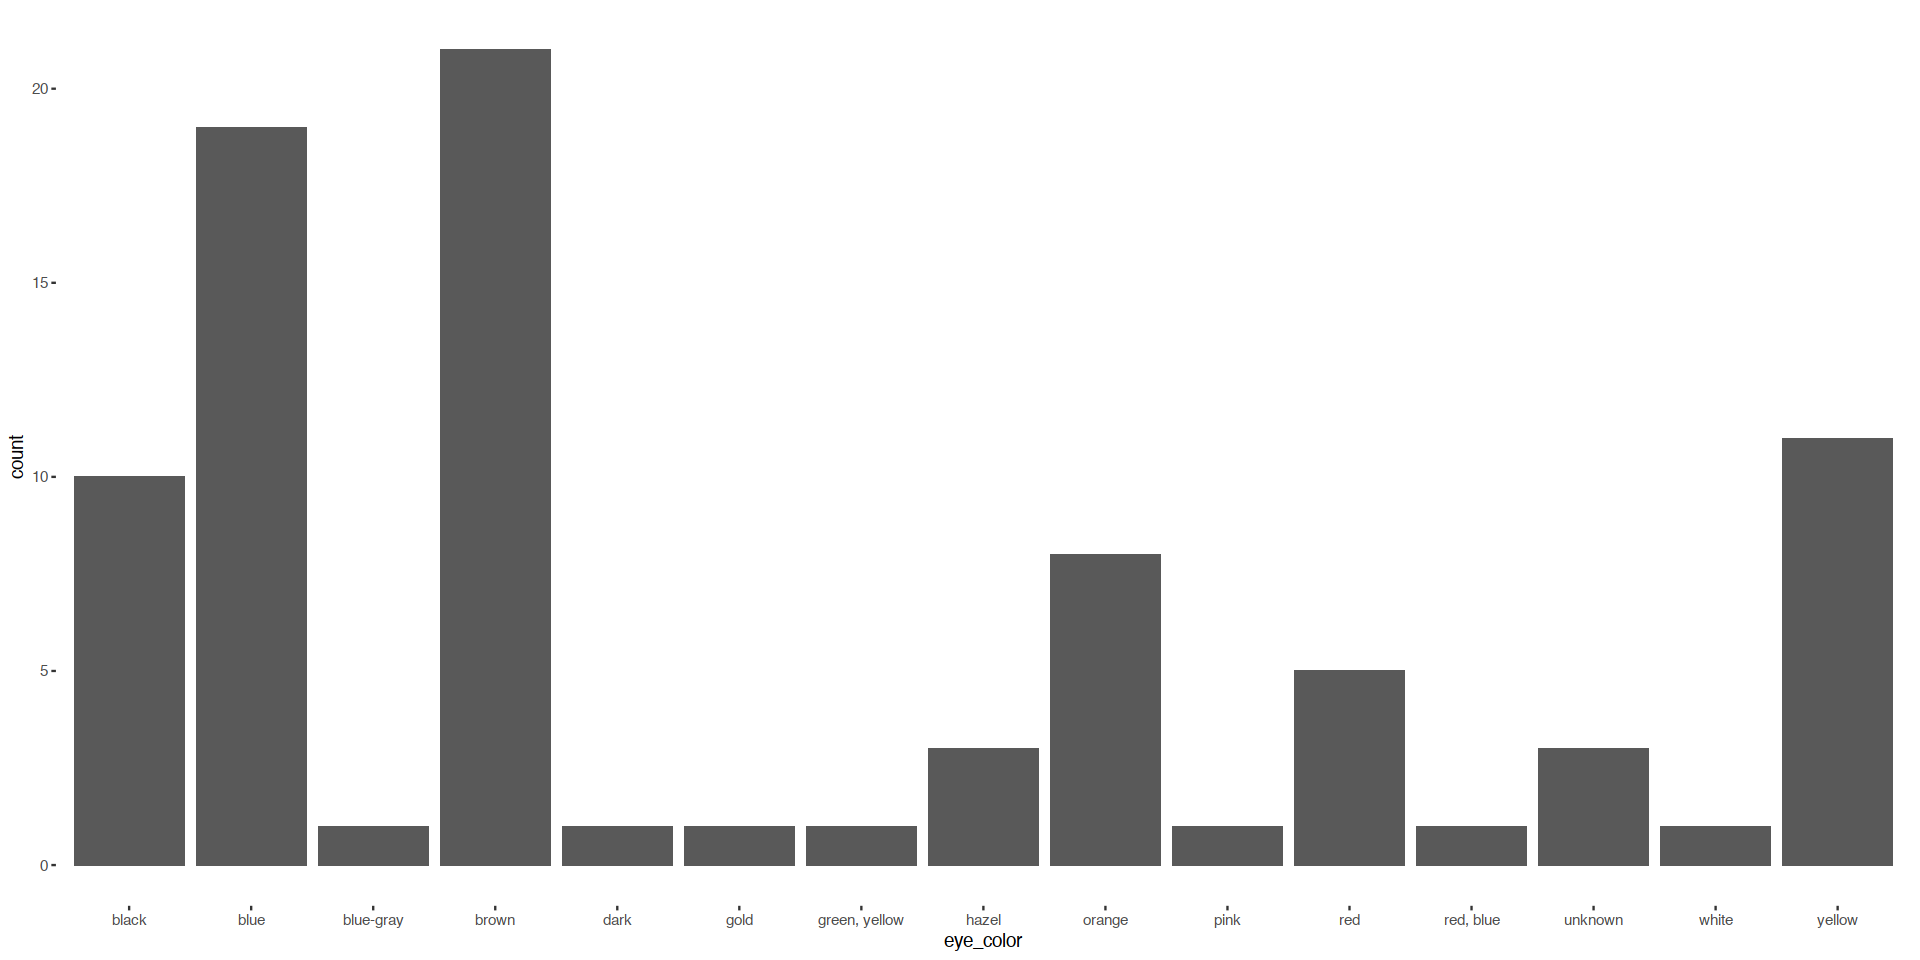

In [19]:
library(ggthemes)

ggplot(
  data = starwars,
  mapping = aes(
    x = eye_color
    )
  ) +
  geom_bar() +
  theme_tufte() 

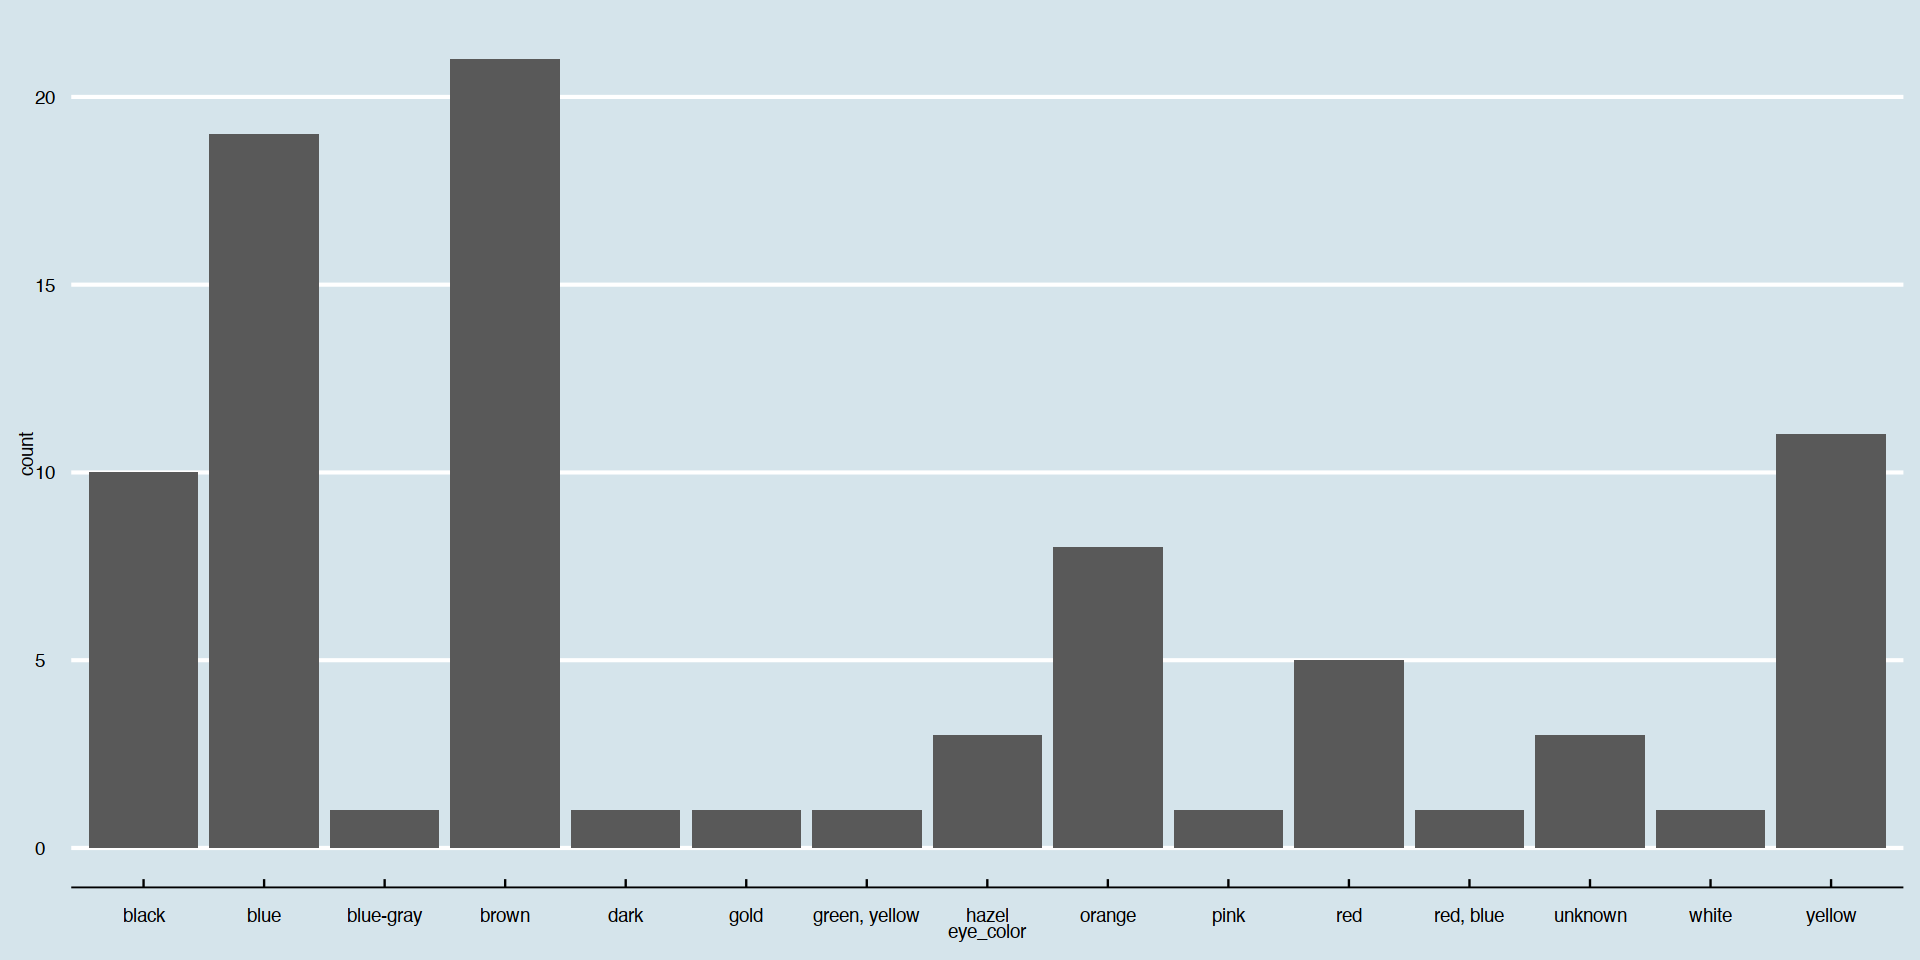

In [20]:
ggplot(
  data = starwars,
  mapping = aes(
    x = eye_color
    )
  ) +
  geom_bar() +
  theme_economist() 

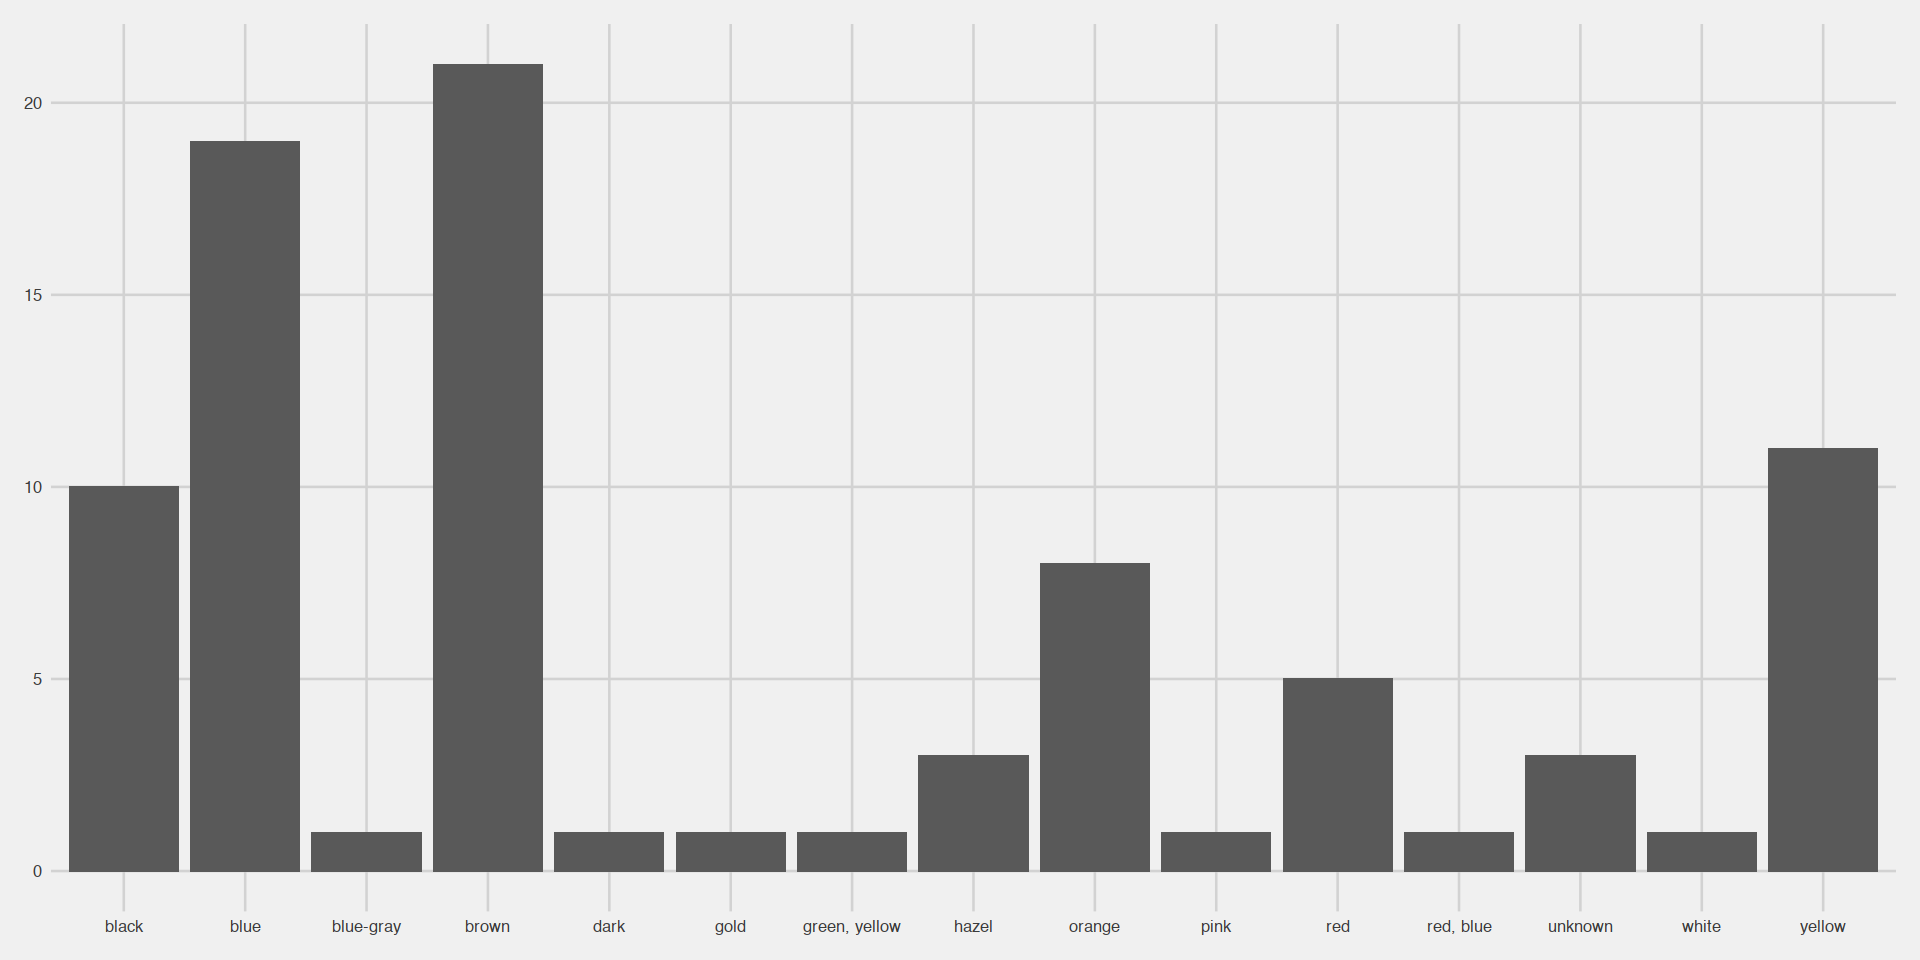

In [21]:
ggplot(
  data = starwars,
  mapping = aes(
    x = eye_color
    )
  ) +
  geom_bar() +
  theme_fivethirtyeight() 

Later on you will learn these & other ways to build advanced visualizations. For now we get to work more with `ggplot2`. 

## More with bar-charts

I want to show a few things with bar-charts now. First, we can specify things a bit differently without altering the result. For example, compare the following two pieces of code. 

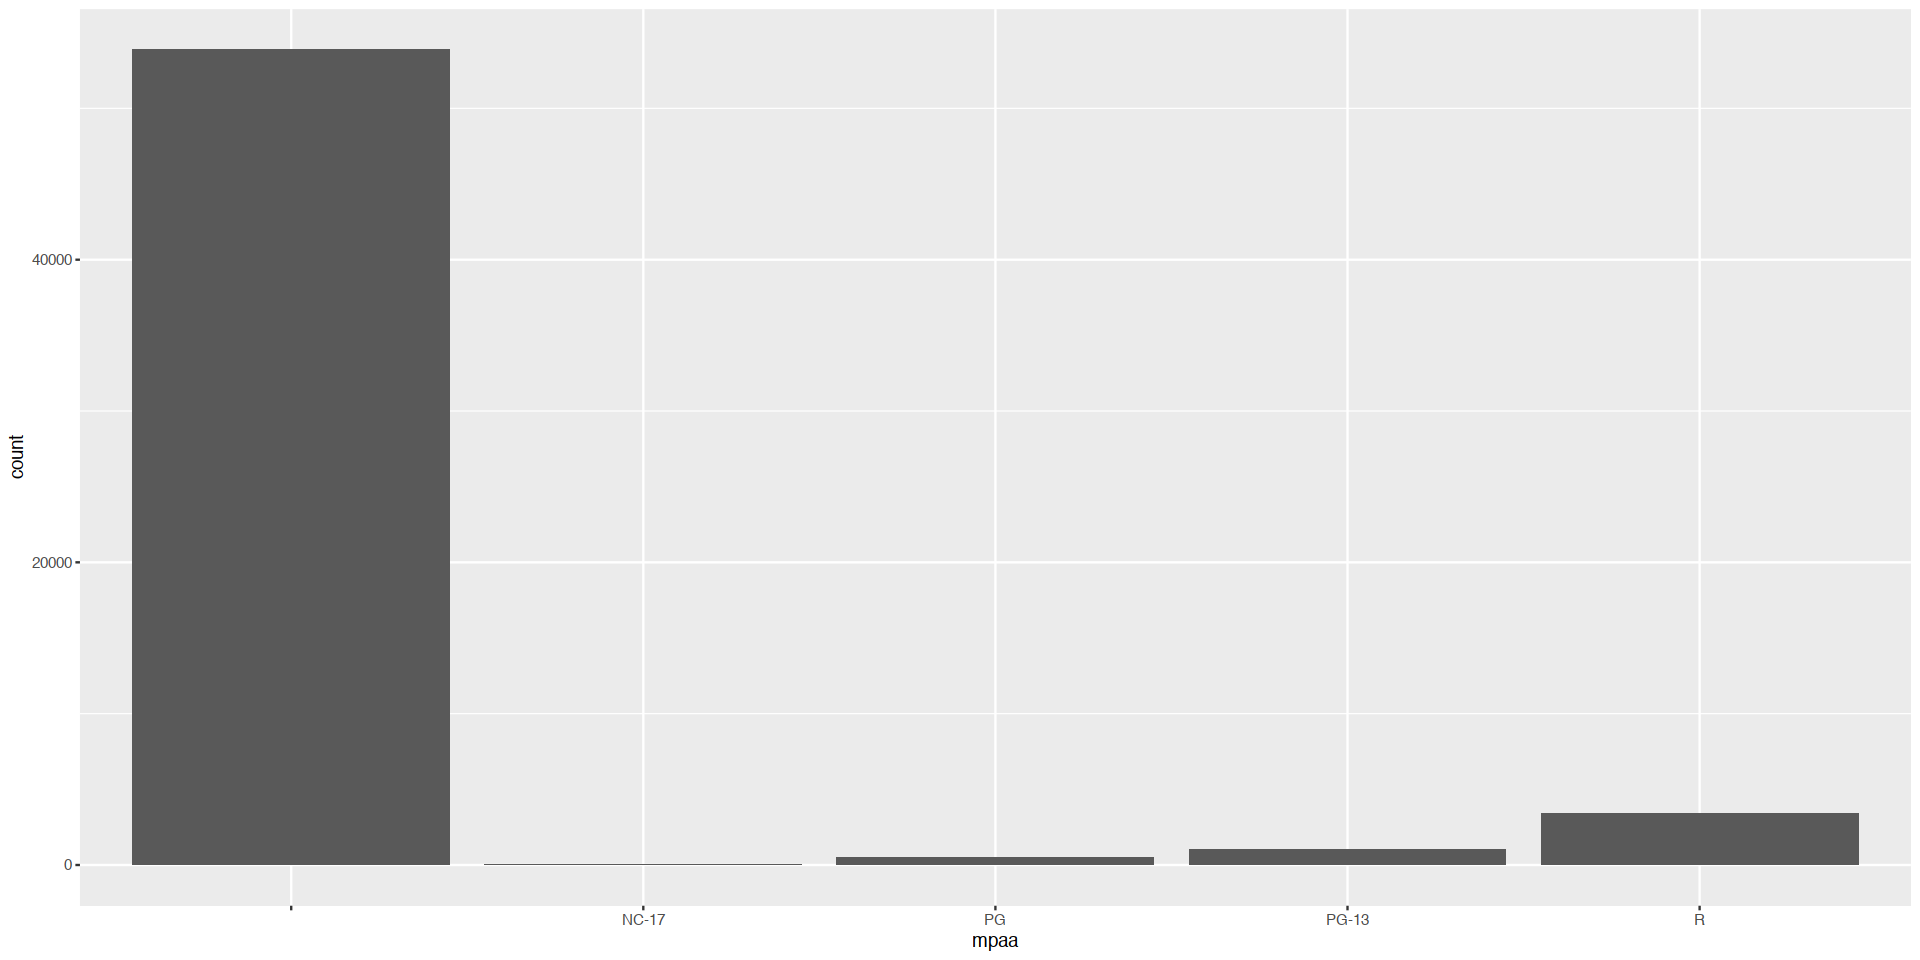

In [22]:
ggplot(
  data = movies,
  mapping = aes(
    x = mpaa
    )
  ) + 
  geom_bar()

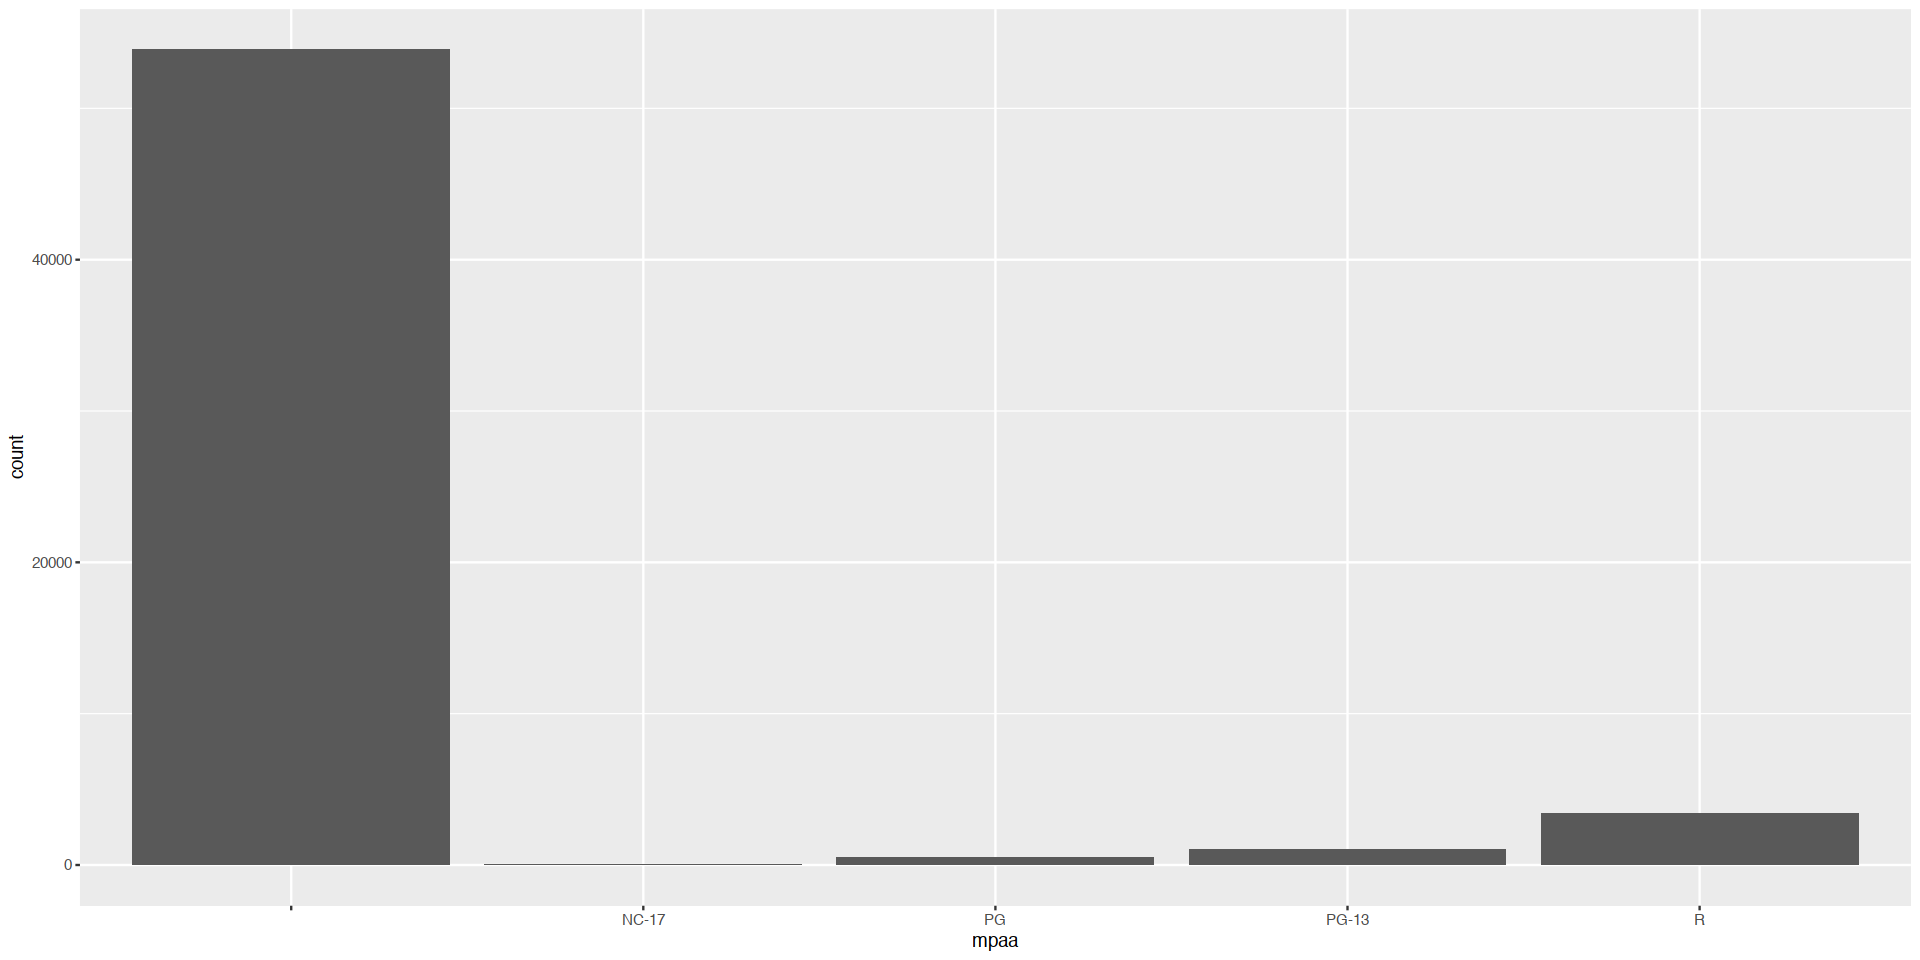

In [23]:
ggplot() + 
  geom_bar(
    data = movies,
    mapping = aes(x = mpaa)
    )

Notice that we switched the `data =` and the `aes()` pieces of the code but that made no difference; this is important to bear in mind because it will come in handy down the road when we need to build some advanced visualizations. 

The plot is sub-optimal since MPAA ratings are missing for a lot of movies and should be  eliminated from the plot via `subset(mpa != "")`  or by running dplyr's `filter()`  to create another data-set. I will lean on `filter()`. 

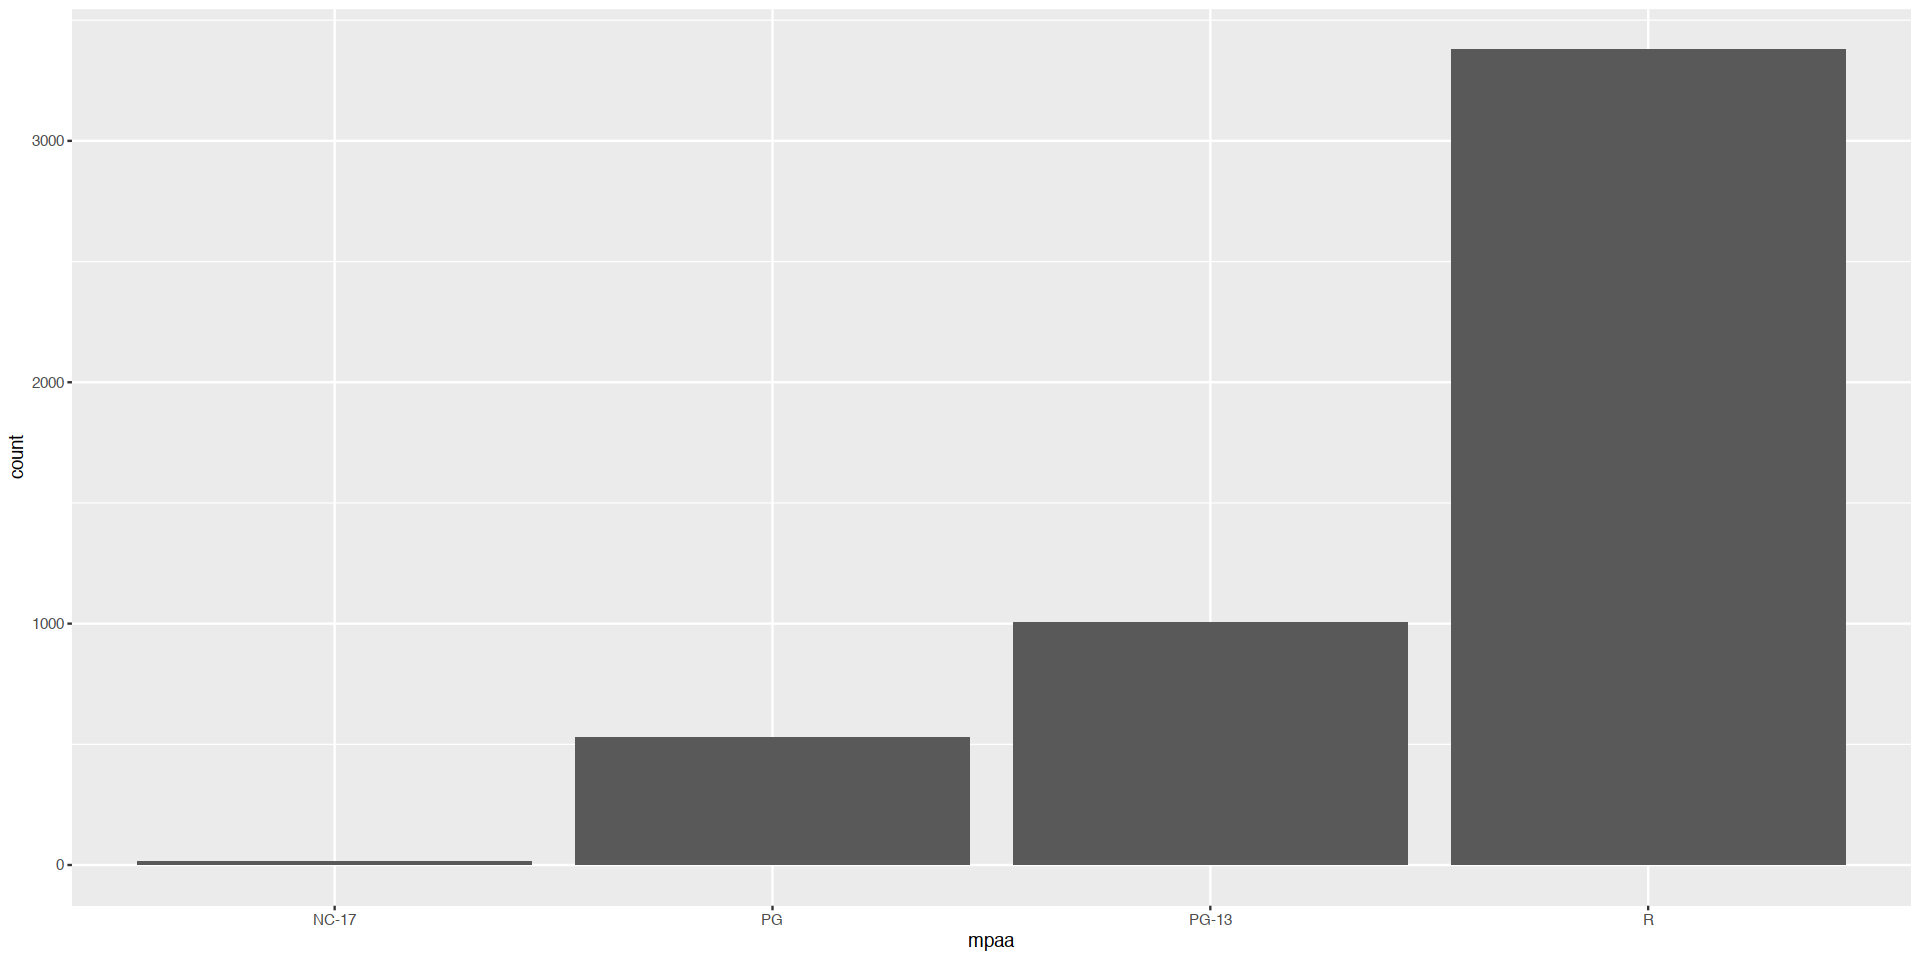

In [24]:
movies %>% 
  filter(mpaa != "") -> movies2 

ggplot() + 
  geom_bar(
    data = movies2,
    mapping = aes(x = mpaa)
    )

The order of the bars here is fortuitous in that it goes from the smallest frequency to the highest frequency, drawing the reader's eye. I said fortuitous because `{ggplot2}` defaults to drawing the bars in an ascending alphabetic/alphanumeric order if the variable is a **character**. See below for an example. 

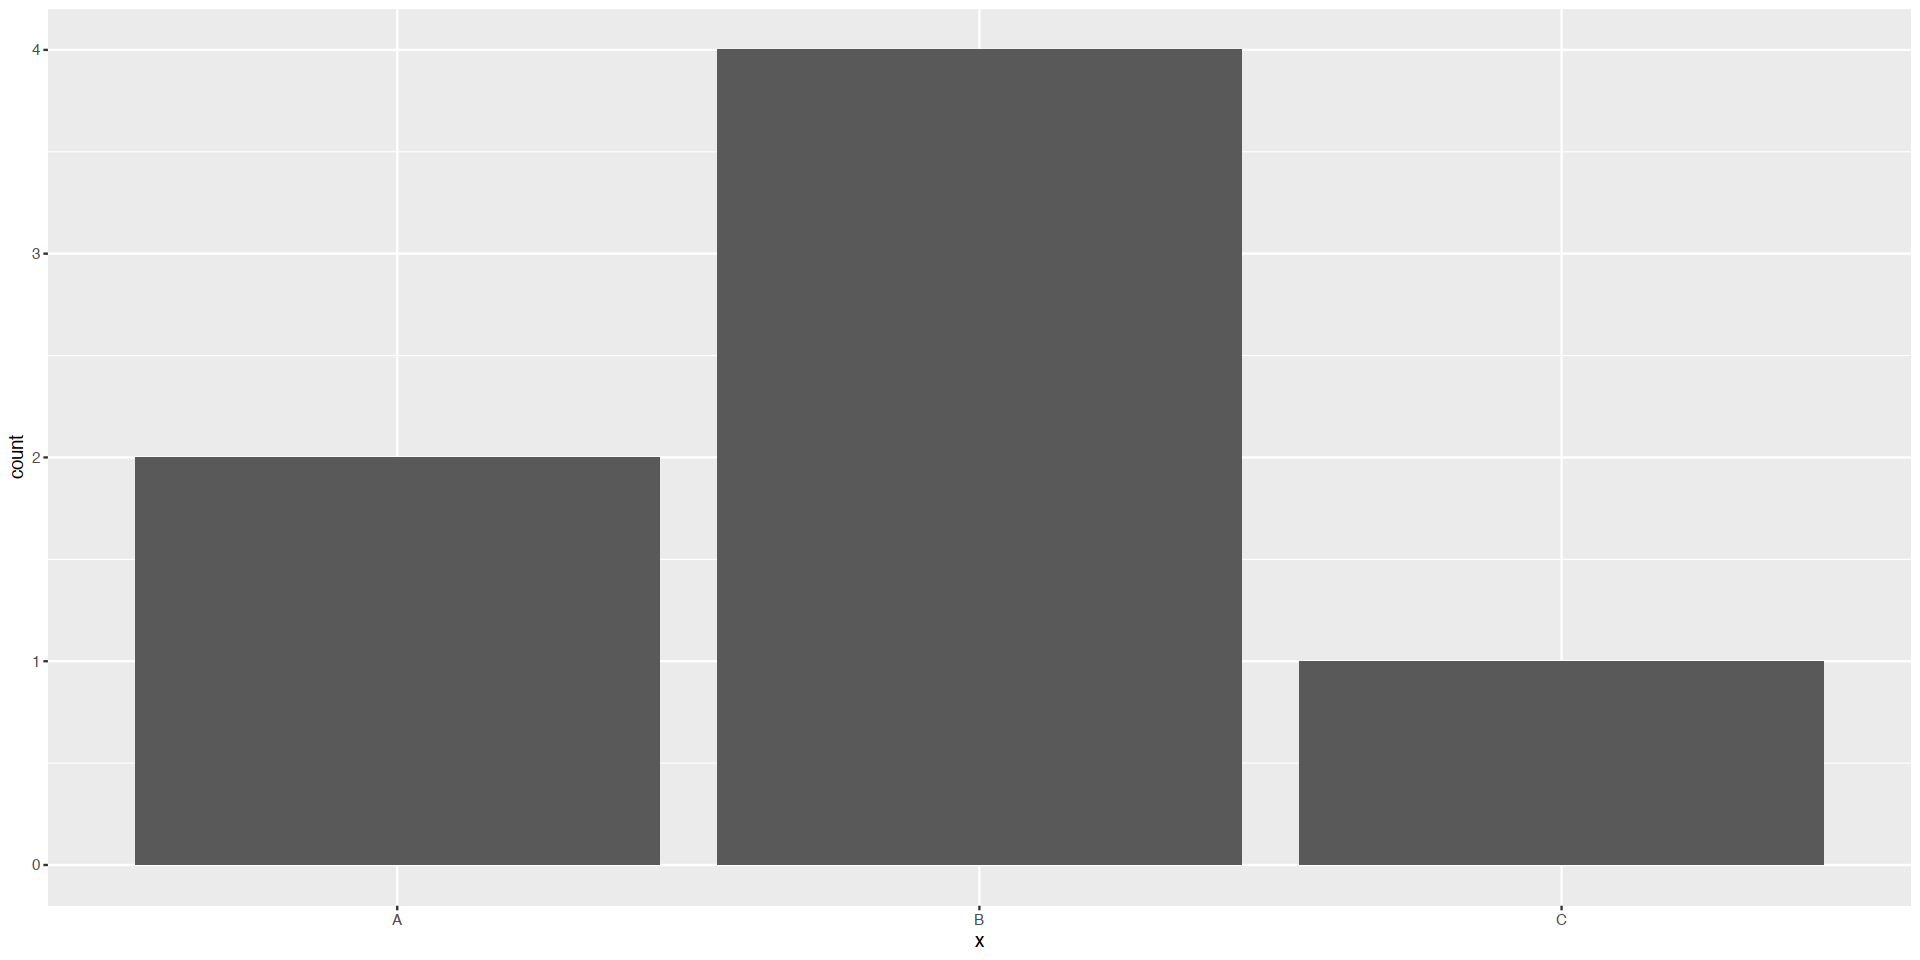

In [25]:
df = tibble(x = c(rep("A", 2), rep("B", 4), rep("C", 1)))

ggplot() + 
  geom_bar(
    data = df, 
    mapping = aes(x = x)
  )

Notice the bars here do not follow in ascending/descending order of frequencies. Later on we'll learn how to order the bars with ascending/descending frequencies or by some other logic. 

What about plotting `relative frequencies` on the y-axis rather than the frequencies? 


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




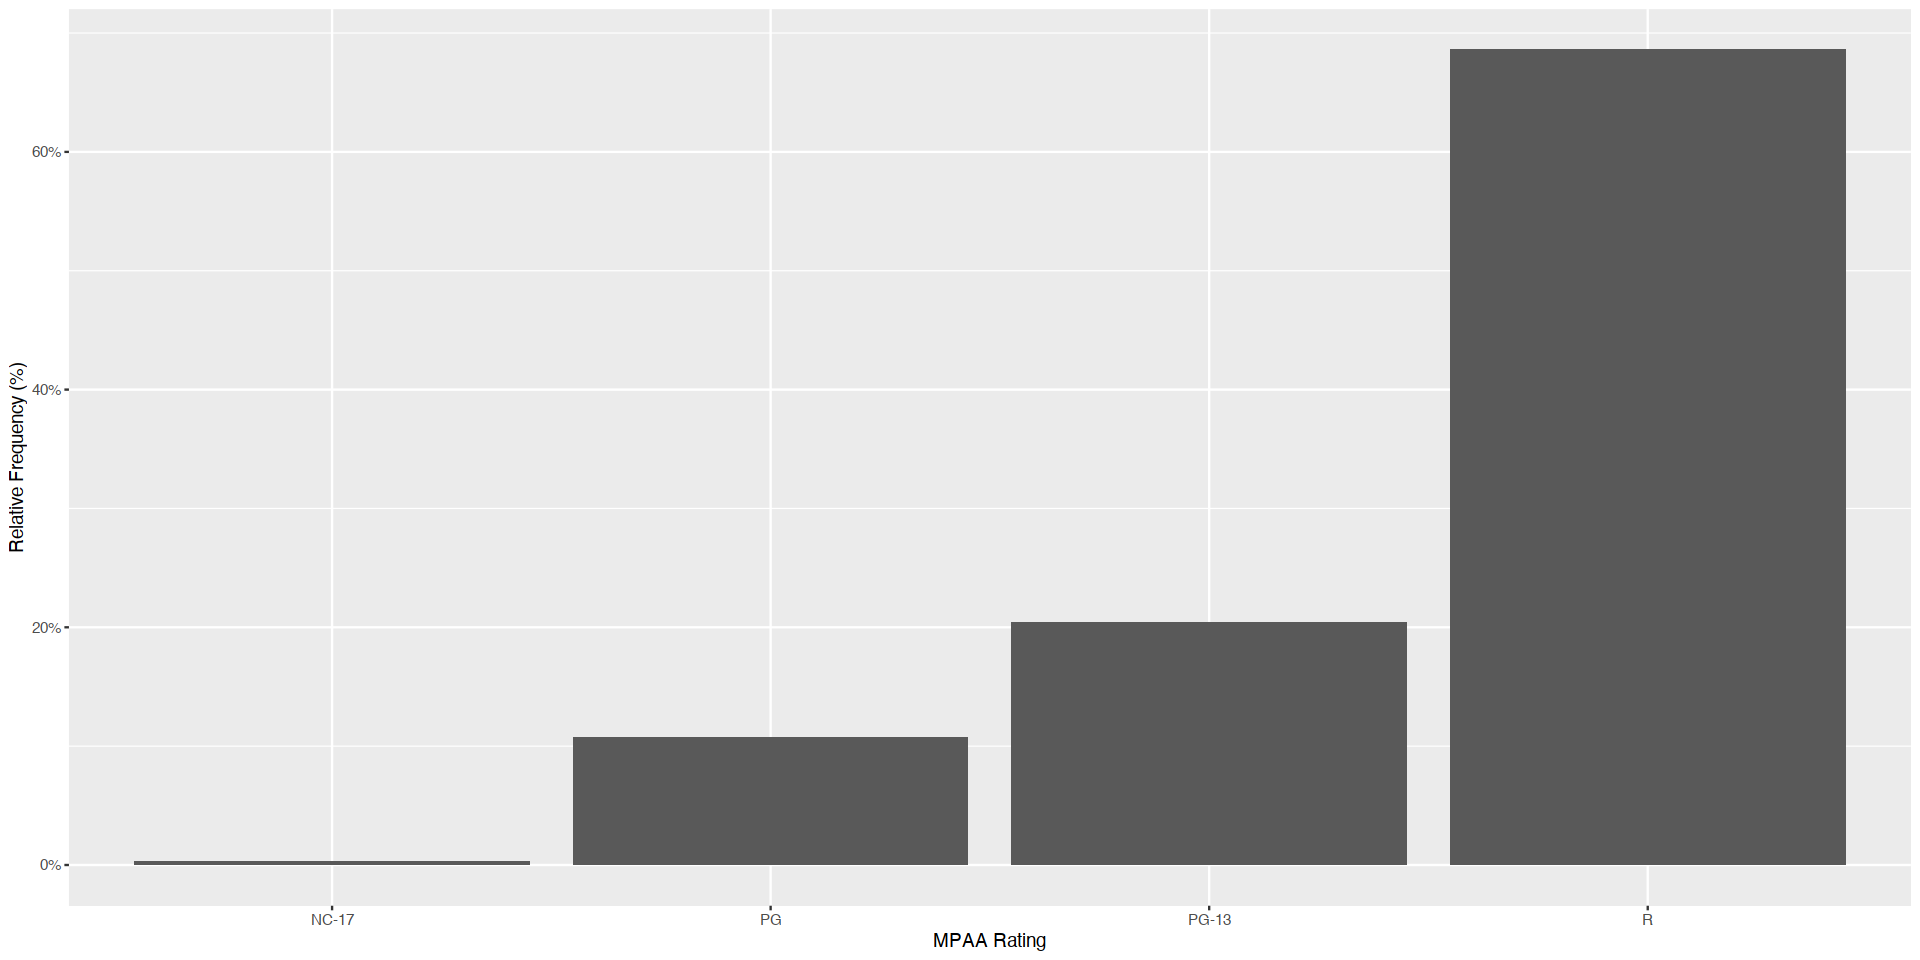

In [26]:
library(scales)

ggplot() + 
  geom_bar(
    data = movies2,
    mapping = aes(
      x = mpaa,
      y = (..count..)/sum(..count..)
      )
    ) + 
  scale_y_continuous(labels = percent) + 
  labs(
    x = "MPAA Rating",
    y  = "Relative Frequency (%)"
    ) 

Note the addition of 

+ `y = (..count..)/sum(..count..)` to change the y-axis to reflect the relative frequency as a proportion, and  
+ `scale_y_continuous(labels = percent)` to then multiply these proportions by 100 to get percentages as the labels rather than 0.2, 0.4, 0.6, etc. 

## Disaggregating bar-charts for groups 
Let us build a simple bar-chart with the `hsb2` data we saw in Module 01. Here we first download it, label the values, save it, and then start charting it.  

In [27]:
read.table(
  'https://stats.idre.ucla.edu/stat/data/hsb2.csv',
  header = TRUE,
  sep = ","
  ) -> hsb2

factor(hsb2$female,
       levels = c(0, 1),
       labels = c("Male", "Female")
       ) -> hsb2$female 

factor(hsb2$race,
       levels = c(1:4),
       labels = c("Hispanic", "Asian", "African American", "White")
       ) -> hsb2$race

factor(hsb2$ses,
       levels = c(1:3),
       labels = c("Low", "Middle", "High")
       ) -> hsb2$ses

factor(hsb2$schtyp,
       levels = c(1:2),
       labels = c("Public", "Private")
       ) -> hsb2$schtyp

factor(hsb2$prog,
       levels = c(1:3),
       labels = c("General", "Academic", "Vocational")
       ) -> hsb2$prog

save(
  hsb2, file = here::here("data", "hsb2.RData")
  )

Warning message in gzfile(file, "wb"):
“cannot open compressed file '/Users/ruhil/Documents/github/my-jbooks/mynewbook/docs/data/hsb2.RData', probable reason 'No such file or directory'”


ERROR: Error in gzfile(file, "wb"): cannot open the connection


In [ ]:
ggplot() + 
  geom_bar(
    data = hsb2,
    mapping = aes(x = ses)) +
  labs(x = "Socioeconomic Status")

Okay, fair enough. But what if I wanted to see how socioeconomic status varies across male and female students?  

In [ ]:
ggplot() + 
  geom_bar(
    data = hsb2,
    mapping = aes(
      x = ses,
      group = female, 
      fill = female
      )
    ) +
  labs(
    x = "Socioeconomic Status",
    y = "Frequency"
  )

This is not very useful since the viewer has to estimate the relative sizes of the two colors within any given bar. That can be fixed with `position = "dodge"`, juxtaposing the bars for the groups as a result, and the end product is much better. But note: `position = "dodge"` has to be put outside the `aes()` but still inside `geom_bar()` so be careful. 

In [ ]:
ggplot() + 
  geom_bar(
    data = hsb2,
    mapping = aes(
      x = ses,
      group = female, 
      fill = female
      ),
    position = "dodge"
    ) +
  labs(
    x = "Socioeconomic Status",
    y = "Frequency"
  )

What if you wanted to calculate percentages within each sex? That is, what percent of male students fall within a particular ses category, and the same thing for female students? 

In [ ]:
ggplot() + 
  geom_bar(
    data = hsb2, 
    aes(
      x = ses, 
      group = female,
      fill = female, 
      y = ..prop..
      ),
    position = "dodge") +
  scale_y_continuous(labels = scales::percent) + 
  labs(
    x = "Socioeconomic Status",
    y = "Relative Frequency (%)"
    )

What about within each ses instead of within gender? That is, what if we wanted percent of Low ses that is Male versus Female, and so on?

In [ ]:
ggplot() + 
  geom_bar(
    data = hsb2, 
    aes(
      x = female, 
      group = ses,
      fill = ses, 
      y = ..prop..
      ),
    position = "dodge") +
  scale_y_continuous(labels = scales::percent) + 
  labs(
    x = "Socioeconomic Status",
    y = "Relative Frequency (%)"
    )

In [ ]:
ggplot() + 
  geom_bar(
    data = hsb2, 
    aes(
      x = female, 
      group = ses,
      fill = ses, 
      y = ..prop..
      ),
    position = "dodge") +
  scale_y_continuous(labels = scales::percent) + 
  labs(
    x = "Socioeconomic Status",
    y = "Relative Frequency (%)"
    ) 

There is some more we will do with bar-charts but for now let us set them aside and instead look at a few other charts -- histograms, box-plots, and line-charts. 

## Histograms 
If you've forgotten what these are, see [histogram](http://tinlizzie.org/histograms/), or then [Yau's piece here](https://flowingdata.com/2014/02/27/how-to-read-histograms-and-use-them-in-r/) and [here](https://flowingdata.com/2017/06/07/how-histograms-work/). [There is a short video available as well](https://vimeo.com/221607341). 

For histograms in ggplot2, `geom_histogram()` is the geometry needed but note that the default number of bins is not very useful and can be tweaked, along with other embellishments that are possible as well. 

In [ ]:
ggplot() + 
  geom_histogram(
    data = hsb2,
    aes(x = read), 
    fill = "cornflowerblue",
    color = "white"
    ) + 
  labs(
    title = "Histogram of Reading Scores",
    x = "Reading Score",
    y = "Frequency"
    )

Note the warning `stat_bin()` using `bins = 30`. Pick better value with `binwidth`. This is because numerical variables need to be grouped in order to have meaningful histograms we can make sense of. How do you define the bins (aka the groups)? We could set `bins = 5` and we could also experiment with `binwidth =`. Let us do `bins = 5` which will say give us 5 groups, and go ahead and calculate them yourself. 

In [ ]:
ggplot() + 
  geom_histogram(
    data = hsb2,
    aes(x = read), 
    fill = "cornflowerblue",
    color = "white",
    bins = 5
    ) + 
  labs(
    title = "Histogram of Reading Scores",
    subtitle = "(with bins = )",
    x = "Reading Score",
    y = "Frequency"
    )

If we wanted more/fewer bins we could tweak it up or down as needed. 
What about binwidth? This will specify how wide each group must be. 

In [ ]:
ggplot() + 
  geom_histogram(
    data = hsb2,
    aes(x = read), 
    fill = "cornflowerblue",
    color = "white",
    binwidth = 5
    ) + 
  labs(
    title = "Histogram of Reading Scores",
    subtitle = "(with binwidth = )",
    x = "Reading Score",
    y = "Frequency"
    )

If we wanted to disaggregate the histogram by one or more categorical variables, we could do so quite easily: 

In [ ]:
ggplot() + 
  geom_histogram(
    data = hsb2,
    aes(x = read), 
    fill = "cornflowerblue",
    color = "white",
    bins = 5
    ) + 
  labs(
    title = "Histogram of Reading Scores",
    subtitle = "(broken out for Male vs. Female students)",
    x = "Reading Score",
    y = "Frequency"
    ) +
  facet_wrap(~ female)

When we do this, it is often useful to organize them so that only one histogram shows up in a row. This is done with the `ncol = 1` command. 

In [ ]:
ggplot() + 
  geom_histogram(
    data = hsb2,
    aes(x = read), 
    fill = "cornflowerblue",
    color = "white",
    bins = 5
    ) + 
  labs(
    title = "Histogram of Reading Scores",
    subtitle = "(broken out for Male vs. Female students)",
    x = "Reading Score",
    y = "Frequency"
    ) +
  facet_wrap(~ female, ncol = 1)

In [ ]:
ggplot() + 
  geom_histogram(
    data = hsb2,
    aes(x = read), 
    fill = "cornflowerblue",
    color = "white",
    bins = 5
    ) + 
  labs(
    title = "Histogram of Reading Scores",
    subtitle = "(broken out by Socioeconomic Status)",
    x = "Reading Score",
    y = "Frequency"
    ) +
  facet_wrap(~ ses, ncol = 1)

Now the distributions are stacked above each, easing comparisons; do they have the same average? Do they vary the same? Are they similarly skewed/symmetric?. 

For breakouts with two categorical variables we could do 

In [ ]:
ggplot() + 
  geom_histogram(
    data = hsb2,
    aes(x = read), 
    fill = "cornflowerblue",
    color = "white",
    bins = 5
    ) + 
  labs(
    title = "Histogram of Reading Scores",
    subtitle = "(broken out by Socioeconomic Status and School Type)",
    x = "Reading Score",
    y = "Frequency"
    ) +
  facet_wrap(ses ~ schtyp, ncol = 3)

Note that `ses ~ schtyp` renders the panels for the first category of `ses` by all categories of schtyp and then repeats for the other categories in rows 2 and 3. If we did `facet_wrap(schtype ~ ses, ncol = 3)` we would have a different result:

In [ ]:
ggplot() + 
  geom_histogram(
    data = hsb2,
    aes(x = read), 
    fill = "cornflowerblue",
    color = "white",
    bins = 5
    ) + 
  labs(
    title = "Histogram of Reading Scores",
    subtitle = "(broken out by Socioeconomic Status and School Type)",
    x = "Reading Score",
    y = "Frequency"
    ) +
  facet_wrap(schtyp ~ ses, ncol = 3) +
  ylim(c(0, 23))

Notice that here I also add a `ylim(c(...))` command to set the minimum and maximum values of the y-axis. This is useful, and I suggest you do not forget to set the y limit to start at 0 or then make a note in the plot for readers so they don't assume it is at 0 when in fact it has been truncated for ease of data presentation. This misstates the pattern in the data, do not do it or then, again, annotate the plot to that effect so nobody is misled. Bar-charts and histograms will have 0 as the minimum y-limit but this is not true for some other plots. 

## Box-plots 
Remember these, our friends from MPA 6010? These can be useful for studying the distribution of a continuous variable. [See this video](https://vimeo.com/222358034). Let us see these in action with the `cmhflights` data. 

In [ ]:
load(
  here::here("data", "cmhflights_01092017.RData")
  )

ggplot() + 
  geom_boxplot(
    data = cmhflights,
    mapping = aes(
      y = ArrDelay,
      x = ""
      ),
    fill = "cornflowerblue"
    ) 

Note: 

+ the `x = ""` is in `aes()` because otherwise with a single group the box-plot will not build up nicely

But, I prefer to see them running horizontally, so how can I do that? With `coord_flip()` since this just flips the columns. 

In [ ]:
ggplot() + 
  geom_boxplot(
    data = cmhflights,
    mapping = aes(
      y = ArrDelay,
      x = ""
      ),
    fill = "cornflowerblue"
    ) +
  coord_flip()

And now for a slightly different data-set, one that measures male adults' hemoglobin concentration for a few populations. 

In [ ]:
read_csv(
  "http://whitlockschluter.zoology.ubc.ca/wp-content/data/chapter02/chap02e3cHumanHemoglobinElevation.csv"
  ) -> hemoglobin

ggplot() +
  geom_boxplot(
    data = hemoglobin,
    mapping = aes(
      x = population,
      y = hemoglobin,
      fill = population
      )
    ) +
  coord_flip() +
  labs(
    x = "Population",
    y = "Hemoglobin Concentration",
    title = "Hemoglobin Concentration in Adult Males",
    subtitle = "(Andes, Ethiopia, Tibet, USA)"
    ) +
  theme(legend.position = "none")

Notice the need for no legend with `fill = population` Notice also how `fill = ` is inside `aes(...)` here because we are asking that each unique value seen in a variable called `population` be mapped to a unique color. 

Could we use our `facet_wrap(...)` here too? Of course. 

In [ ]:
ggplot() + 
  geom_boxplot(
    data = cmhflights,
    mapping = aes(
      y = ArrDelay,
      x = Carrier
      ),
    fill = "cornflowerblue"
    ) +
  coord_flip() +
  facet_wrap(~ Month)

## Line-charts 
If we have data over time for one or more units, then line-charts work really well to exhibit trends. A classic, current example would be the number of confirmed COVID-19 cases per country per date. For example, say we have data on the unemployment rate for the country. These data are coming from the `{plotly}` library so we have to make sure it is installed and load it.

In [ ]:
library(plotly)
data(economics)
names(economics)
ggplot() +
  geom_line(
    data = economics, 
    mapping = aes(
      x = date,
      y = uempmed
      )
    ) + 
  labs(
    x = "Date",
    y = "Unemployment Rate"
  )

They can look very plain and aesthetically unappealing unless you dress them up. See the one below and then the one that follows. 

In [ ]:
load(
  here::here("data", "gap.df.RData")
  )

gap.df %>%
    ungroup() %>%
    ggplot() +
    geom_line(
    mapping = aes(
      x = year,
      y = LifeExp,
      group = continent,
      color = continent
      )
    ) + 
  geom_point(
    mapping = aes(
      x = year,
      y = LifeExp,
      group = continent,
      color = continent
      )
    ) + 
  labs(
    x = "Year",
    y = "Median Life Expectancy (in years)",
    color = ""
  ) + 
  theme(legend.position = "bottom") 

## Scatter-plots 
These work well if we have two or more continuous variables, and work well to highlight the nature and strength of a relationship between the two variables .... what happens to `y` as `x` increases? s

In [ ]:
ggplot() + 
  geom_point(
    data = hsb2, 
    mapping = aes(
      x = write,
      y = science
      )
    ) +
  labs(
    x = "Writing Scores", 
    y = "Science Scores"
    ) 

We could highlight the different `ses` groups, to see if there is any difference in the relationship between writing scores and science scores by the different ses levels. 

In [ ]:
ggplot() +
  geom_point(
    data = hsb2,
    mapping = aes(
      x = write,
      y = science,
      color = ses
      )
    ) + 
  labs(
    x = "Writing Scores", 
    y = "Science Scores",
    color = ""
    ) + 
  theme(legend.position = "bottom") 

This is not very helpful so why not breakout ses for ease of interpretation? 

In [ ]:
ggplot() +
  geom_point(
    data = hsb2,
    mapping = aes(
      x = write,
      y = science
      )
    ) + 
  labs(
    x = "Writing Scores", 
    y = "Science Scores"
    ) + 
  facet_wrap(~ ses) 

Could we add another layer, perhaps `female`? 

In [ ]:
ggplot() +
  geom_point(
    data = hsb2,
    mapping = aes(
      x = write,
      y = science
      )
    ) + 
  labs(
    x = "Writing Scores", 
    y = "Science Scores"
    ) + 
  facet_wrap(ses ~ female, ncol = 2) 

And finally, a few suggestion about how to build up your visualizations: 

- start with pencil and paper, sketch prototypes of desired visualization(s)
- graphics are relatively easy to generate with base R & with `ggplot2` 
- common-sense: `number` & `type` of variable(s) guide plotting 
- stay `color conscious`: sensible colors & sensitive to color blindness
- experiment, experiment, experiment until you are happy 
- learning resources available online 
- if you learn something new in R, write it down 

----------

# Exercises for Practice

## Exercise 01 -- Nobel Prize Winners 
Georgios Karamanis gathered and shared data on Nobel prize winners over the years, with a fair amount of detail, and used in the `tidytuesday` series a while back. These data are to be used for the questions that follow. 

In [ ]:
readr::read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-05-14/nobel_winners.csv"
    ) -> nobel_winners 

|variable             |class     |description |
|:---|:---|:-----------|
|prize_year           |double    | Year that Nobel Prize was awarded|
|category             |character | Field of study/category|
|prize                |character | Prize Name |
|motivation           |character | Motivation of the award |
|prize_share          |character | Share eg 1 of 1, 1 of 2, 1 of 4, etc |
|laureate_id          |double    | ID assigned to each winner |
|laureate_type        |character | Individual or organization  |
|full_name            |character | name of the winner|
|birth_date           |double    | birth date of winner |
|birth_city           |character | birth city/state of winner |
|birth_country        |character | birth country of winner |
|gender               |character | binary gender of the winner |
|organization_name    |character | organization name |
|organization_city    |character | organization city |
|organization_country |character | organization country |
|death_date           |double    | death date of the winner (if dead) |
|death_city           |character | death city (if dead) |
|death_country        |character | death country (if dead) |

(a) First create `nobel.df` that keeps only records starting in the year 1960, and only for the "Physics" category. Now generate an appropriate chart that shows the distribution of winners by `birth_country` 

(b) Now break this distribution out by `gender` to see how winners by country differs across gender 

(c) Now go back to `noble_winners`, the full data-set, and create a simple plot that shows the distribution of prize winners by `death_country`, `gender`, and `category`  

## Exercise 02 -- Water levels in the Great Lakes

Download the monthly Great Lakes water level data-set [SPSS format from here](https://aniruhil.github.io/avsr/teaching/dataviz/greatlakes.sav) and [Excel format from here](https://aniruhil.github.io/avsr/teaching/dataviz/greatlakes.xlsx). *Note that water level is in meters.* 

You may use the following command to read in the excel file: 

In [ ]:
library(readxl)
url <- "https://aniruhil.github.io/avsr/teaching/dataviz/greatlakes.xlsx"
destfile <- "greatlakes.xlsx"
curl::curl_download(url, destfile)
read_excel(destfile, col_types = c("date", 
     "numeric", "numeric", "numeric", "numeric", 
     "numeric")) -> greatlakes 

greatlakes %>%
    head()

Now use an appropriate chart to show the water level for Lake Superior. 

## Exercise 03 -- County Health Rankings
Download the 2017 County Health Rankings data [SPSS format from here](https://aniruhil.github.io/avsr/teaching/dataviz/CountyHealthRankings2017.sav), [Excel format from here](https://aniruhil.github.io/avsr/teaching/dataviz/CountyHealthRankings2017.xlsx) and the [accompanying codebook](http://www.countyhealthrankings.org/sites/default/files/2017TrendsDocumentation.pdf). 

These data can also be downloaded with the code provided below: 

In [ ]:
library(readxl)
url <- "https://aniruhil.github.io/avsr/teaching/dataviz/CountyHealthRankings2017.xlsx"
destfile <- "CountyHealthRankings2017.xlsx"
curl::curl_download(url, destfile)
read_excel(destfile) -> chr.df 

chr.df %>%
    head()

Construct appropriate plots that shows the relationship between the following pairs of variables 

(a) Adult obesity and High school graduation 

(b) Children in poverty and High school graduation 

(c) Preventable hospital stays and Unemployment rate 

## Exercise 04 -- Unemployment Rates
Use the unemployment data given to you `(unemprate.RData)` and construct appropriate plots that show the distribution of unemployment rates across years for each of the four educational attainment groups. 

In [ ]:
load("data/unemprate.RData")

urate %>%
    head()

Be sure to use a unique color for each educational attainment group
